### Problem Identification 

### Introduction

In the face of mounting environmental challenges, sustainable agriculture has become a critical concern for the United States. The efficient use of water resources in food production is of paramount importance, as it directly impacts the ecosystem and agricultural sustainability. This project aims to shed light on the potential unsustainability of current agricultural practices in the country by analyzing three key datasets: the "Environmental Impact of Food Production" dataset from Kaggle, food production data from the United States Department of Agriculture (USDA), and drought data from "The U.S. Drought Monitor," produced in partnership with the National Drought Mitigation Center at the University of Nebraska-Lincoln, the United States Department of Agriculture, and the National Oceanic and Atmospheric Administration.

Data Set 1, sourced from the "Environmental Impact of Food Production" dataset on Kaggle, provides crucial insights into highly water-use-heavy agricultural products. By identifying commodities that demand significant water resources during their production processes, I will highlight potential areas of concern for sustainable agricultural practices.

Concurrently, Data Set 2, acquired from the USDA's quickstats.nass.usda.gov, offers valuable information on the geographic distribution of agricultural activities across the United States. This dataset provides a comprehensive overview of the regions that play pivotal roles in the country's food production, enabling me to understand the concentration of agricultural practices in specific areas.

The crux of the project lies in the analysis of Data Set 3, which records levels of drought across various states and regions. Sourced from "The U.S. Drought Monitor," this dataset offers real-time information on drought severity and its spatial distribution. By integrating this data with the information from the other two datasets, I aim to establish correlations between water-intensive agricultural practices and regions experiencing high levels of drought. This correlation could raise concerns about the sustainability of current agricultural practices and water resource management in the affected areas.

While the project reveals potential issues with the current agricultural landscape, it also highlights the absence of a widely recognized eco-label in the U.S. that specifically considers water usage and water pollution as primary criteria for certification. The decentralized nature of water-related challenges across states may render a uniform, one-size-fits-all ecolabel inadequate. Hence, the exploration of decentralized ecolabeling becomes an essential aspect of this study.

Ultimately, this project serves as a call to action for a comprehensive examination of the sustainability of agricultural practices in the context of water usage and drought conditions. By understanding the intricate relationship between water-intensive agriculture, geographical distribution, and drought prevalence, I can pave the way for informed policy decisions and eco-conscious practices in the agricultural sector. This research endeavor seeks to contribute to the broader efforts of addressing environmental challenges and promoting sustainable agriculture in the United States.

In [1101]:
!pip install tabulate
!pip install tabula-py




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Importing Libraries 

In [1102]:
import pandas as pd
import gzip

from tabulate import tabulate

In [1103]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

### Importing Datasets 

In [1104]:
df_food = pd.read_csv('/Users/admin/Documents/case_studdy_1/Food_Production.csv')



# Display the DataFrame in a nicely formatted table
print(tabulate(df_food.head(), headers='keys', tablefmt='grid'))

+----+---------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------------------------+------------------------------------------------------------------------+-------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------

In [1105]:
!pip install pandas matplotlib



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Drought Dataset

In [1106]:
import pandas as pd

# Read the data
df = pd.read_csv('/Users/admin/Documents/case_studdy_1/dm_export_20170101_20171231.csv')

# Convert MapDate to datetime and extract the year
df['Year'] = pd.to_datetime(df['MapDate'], format='%Y%m%d').dt.year

# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the mean value for each state and year
yearly_data = df.groupby(['StateAbbreviation'])[numeric_columns].mean().reset_index()

print(yearly_data.head())

  StateAbbreviation       MapDate       None         D0         D1         D2  \
0                AK  2.017048e+07  82.057358  17.942642   1.100943   0.000000   
1                AL  2.017048e+07  61.694151  38.305849  20.634717   9.433208   
2                AR  2.017048e+07  54.102453  45.897547  27.718679  11.990566   
3                AZ  2.017048e+07  44.681509  55.318491  27.258868   0.921887   
4                CA  2.017048e+07  68.445283  31.554717  15.428868   5.724717   

         D3        D4  StatisticFormatID         Year  
0  0.000000  0.000000                1.0  2016.981132  
1  2.844528  0.361887                1.0  2016.981132  
2  2.547358  0.000000                1.0  2016.981132  
3  0.000000  0.000000                1.0  2016.981132  
4  2.572830  0.771321                1.0  2016.981132  


In [1107]:
# Define a dictionary that maps old column names to new ones
column_names = {
    'D0': 'Abnormally Dry',
    'D1': 'Moderate Drought',
    'D2': 'Severe Drought',
    'D3': 'Extreme Drought',
    'D4': 'Exceptional Drought'
}

# Rename the columns
df_drought = yearly_data.rename(columns=column_names)

df_drought_new = df_drought.copy()
df_drought_new = df_drought_new.rename(columns=column_names)

print(tabulate(df_drought_new.head(), headers='keys', tablefmt='grid'))

print(df_drought_new['StateAbbreviation'].isnull())


+----+---------------------+-------------+---------+------------------+--------------------+------------------+-------------------+-----------------------+---------------------+---------+
|    | StateAbbreviation   |     MapDate |    None |   Abnormally Dry |   Moderate Drought |   Severe Drought |   Extreme Drought |   Exceptional Drought |   StatisticFormatID |    Year |
+====+=====================+=============+=========+==================+====================+==================+===================+=======================+=====================+=========+
|  0 | AK                  | 2.01705e+07 | 82.0574 |          17.9426 |            1.10094 |         0        |           0       |              0        |                   1 | 2016.98 |
+----+---------------------+-------------+---------+------------------+--------------------+------------------+-------------------+-----------------------+---------------------+---------+
|  1 | AL                  | 2.01705e+07 | 61.6942 |        

In [1108]:
df_drought_new = df_drought_new.rename(columns={'StateAbbreviation': 'State'})

# Print the updated DataFrame to see the changes
print(df_drought_new.head())

  State       MapDate       None  Abnormally Dry  Moderate Drought  \
0    AK  2.017048e+07  82.057358       17.942642          1.100943   
1    AL  2.017048e+07  61.694151       38.305849         20.634717   
2    AR  2.017048e+07  54.102453       45.897547         27.718679   
3    AZ  2.017048e+07  44.681509       55.318491         27.258868   
4    CA  2.017048e+07  68.445283       31.554717         15.428868   

   Severe Drought  Extreme Drought  Exceptional Drought  StatisticFormatID  \
0        0.000000         0.000000             0.000000                1.0   
1        9.433208         2.844528             0.361887                1.0   
2       11.990566         2.547358             0.000000                1.0   
3        0.921887         0.000000             0.000000                1.0   
4        5.724717         2.572830             0.771321                1.0   

          Year  
0  2016.981132  
1  2016.981132  
2  2016.981132  
3  2016.981132  
4  2016.981132  


### Food Production Dataset 

In [1109]:
food_production = pd.read_csv('/Users/admin/Documents/case_studdy_1/Food_Production.csv')

print(tabulate(food_production.head(), headers='keys', tablefmt='grid'))


+----+---------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------------------------+------------------------------------------------------------------------+-------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------

In [1110]:
df = pd.read_csv('/Users/admin/Documents/case_studdy_1/NASS.csv')

print(tabulate(df.head(), headers='keys', tablefmt='grid'))

print(df.columns.unique())


nuts = pd.read_csv('/Users/admin/Documents/case_studdy_1/nuts and fruit.csv')

print(tabulate(nuts.head(), headers='keys', tablefmt='grid'))

print(nuts.columns.unique())

pultry = pd.read_csv('/Users/admin/Documents/case_studdy_1/poultry.csv')

print(tabulate(pultry.head(), headers='keys', tablefmt='grid'))

print(pultry.columns.unique())



+----+-----------+--------+----------+---------------+-------------+---------+--------------+---------------+--------------------+----------+---------------+------------+----------+------------------+-------------+-------------+-----------------------------------------------+----------+-------------------+------------+----------+
|    | Program   |   Year | Period   |   Week Ending | Geo Level   | State   |   State ANSI |   Ag District |   Ag District Code |   County |   County ANSI |   Zip Code |   Region |   watershed_code |   Watershed | Commodity   | Data Item                                     | Domain   | Domain Category   | Value      |   CV (%) |
+====+===========+========+==========+===============+=============+=========+==============+===============+====================+==========+===============+============+==========+==================+=============+=============+===============================================+==========+===================+============+==========+
|  0

In [1111]:
# assuming your DataFrame is stored in df
df = df.drop(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State ANSI', 'Ag District', 'Ag District Code','County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed', 'CV (%)'], axis=1)

nuts = nuts.drop(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State ANSI', 'Ag District', 'Ag District Code','County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed', 'CV (%)'], axis=1)

pultry = pultry.drop(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State ANSI', 'Ag District', 'Ag District Code','County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed', 'CV (%)'], axis=1)


In [1112]:
df = df.drop(['Domain','Domain Category'], axis=1)


print(tabulate(df.head(), headers='keys', tablefmt='grid'))

nuts = nuts.drop(['Domain','Domain Category'], axis=1)



print(tabulate(milk.head(), headers='keys', tablefmt='grid'))

pultry = pultry.drop(['Domain','Domain Category'], axis=1)



+----+---------+----------+-------------+-----------------------------------------------+------------+
|    | State   |   County | Commodity   | Data Item                                     | Value      |
+====+=========+==========+=============+===============================================+============+
|  0 | ALABAMA |      nan | CATTLE      | CATTLE - CALF CROP, MEASURED IN HEAD          | 630,000    |
+----+---------+----------+-------------+-----------------------------------------------+------------+
|  1 | ALABAMA |      nan | CORN        | CORN - ACRES PLANTED                          | 250,000    |
+----+---------+----------+-------------+-----------------------------------------------+------------+
|  2 | ALABAMA |      nan | CORN        | CORN, GRAIN - PRODUCTION, MEASURED IN BU      | 39,245,000 |
+----+---------+----------+-------------+-----------------------------------------------+------------+
|  3 | ALABAMA |      nan | COTTON      | COTTON - ACRES PLANTED         

In [1113]:
df = df.drop(['County'], axis=1)

nuts = nuts.drop(['County'], axis=1)

pultry = pultry.drop(['County'], axis=1)


In [1114]:
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

print(tabulate(nuts.head(), headers='keys', tablefmt='grid'))

print(tabulate(pultry.head(), headers='keys', tablefmt='grid'))


+----+---------+-------------+-----------------------------------------------+------------+
|    | State   | Commodity   | Data Item                                     | Value      |
+====+=========+=============+===============================================+============+
|  0 | ALABAMA | CATTLE      | CATTLE - CALF CROP, MEASURED IN HEAD          | 630,000    |
+----+---------+-------------+-----------------------------------------------+------------+
|  1 | ALABAMA | CORN        | CORN - ACRES PLANTED                          | 250,000    |
+----+---------+-------------+-----------------------------------------------+------------+
|  2 | ALABAMA | CORN        | CORN, GRAIN - PRODUCTION, MEASURED IN BU      | 39,245,000 |
+----+---------+-------------+-----------------------------------------------+------------+
|  3 | ALABAMA | COTTON      | COTTON - ACRES PLANTED                        | 435,000    |
+----+---------+-------------+-----------------------------------------------+--

In [1115]:
df = df[df['Data Item'].str.contains('PRODUCTION|HEAD', na=False)]

print(tabulate(df.head(), headers='keys', tablefmt='grid'))



+----+---------+-------------+-----------------------------------------------+------------+
|    | State   | Commodity   | Data Item                                     | Value      |
+====+=========+=============+===============================================+============+
|  0 | ALABAMA | CATTLE      | CATTLE - CALF CROP, MEASURED IN HEAD          | 630,000    |
+----+---------+-------------+-----------------------------------------------+------------+
|  2 | ALABAMA | CORN        | CORN, GRAIN - PRODUCTION, MEASURED IN BU      | 39,245,000 |
+----+---------+-------------+-----------------------------------------------+------------+
|  4 | ALABAMA | COTTON      | COTTON - PRODUCTION, MEASURED IN 480 LB BALES | 808,000    |
+----+---------+-------------+-----------------------------------------------+------------+
|  6 | ALABAMA | CUCUMBERS   | CUCUMBERS - PRODUCTION, MEASURED IN CWT       | 756,000    |
+----+---------+-------------+-----------------------------------------------+--

In [1116]:
print(tabulate(food_production.head(), headers='keys', tablefmt='grid'))

print(df['Commodity'].unique())
print(food_production['Food product'].unique())
print(nuts['Commodity'].unique())
print(pultry['Commodity'].unique())

+----+---------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------------------------+------------------------------------------------------------------------+-------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------

In [1117]:

#creating uniform labels to combine datsets

mapping_dict = {
    'Wheat & Rye (Bread)': ['WHEAT', 'RYE'],
    'Maize (Meal)': 'CORN',
    'Barley (Beer)': 'BARLEY',
    'Oatmeal': 'OATS',
    'Rice': 'RICE',
    'Potatoes': 'POTATOES',
    'Cassava': None,  # Not present in the data
    'Cane Sugar': 'SUGARCANE',
    'Beet Sugar': 'SUGARBEETS',
    'Other Pulses': ['BEANS', 'LENTILS', 'CHICKPEAS'],  # Assumed matches
    'Peas': 'PEAS',
    'Nuts': ['PECANS'],  # Assumed match
    'Groundnuts': None,  # Not present in the data
    'Soymilk': 'SOYBEANS',
    'Tofu': 'SOYBEANS',
    'Soybean Oil': 'SOYBEANS',
    'Palm Oil': None,  # Not present in the data
    'Sunflower Oil': 'SUNFLOWER',
    'Rapeseed Oil': 'CANOLA',
    'Olive Oil': 'OLIVES',
    'Tomatoes': 'TOMATOES',
    'Onions & Leeks': 'ONIONS',
    'Root Vegetables': 'SWEET POTATOES',  # Assumed match
    'Brassicas': ['CABBAGE', 'BROCCOLI', 'CAULIFLOWER'],
    'Other Vegetables': ['CUCUMBERS', 'LETTUCE', 'MELONS', 'SPINACH', 'PEPPERS', 'PUMPKINS', 'SQUASH', 'ARTICHOKES', 'ASPARAGUS', 'CARROTS', 'CELERY', 'GARLIC'],  # Assumed matches
    'Citrus Fruit': None,  # Not present in the data
    'Bananas': 'BANANAS',
    'Apples': 'APPLES',
    'Berries & Grapes': 'GRAPES',  # Assumed match
    'Wine': None,  # Not present in the data
    'Other Fruit': ['PEACHES', 'APRICOTS', 'AVOCADOS', 'CHERRIES', 'FIGS', 'KIWIFRUIT', 'NECTARINES', 'PEARS', 'STRAWBERRIES', 'BANANAS', 'BLACKBERRIES', 'BOYSENBERRIES'],  # Assumed matches
    'Coffee': None,  # Not present in the data
    'Dark Chocolate': None,  # Not present in the data
    'Beef (beef herd)': 'CATTLE',
    'Beef (dairy herd)': None,  # Not present in the data
    'Lamb & Mutton': 'SHEEP',
    'Pig Meat': 'HOGS',
    'Poultry Meat': ['TURKEYS', 'CHICKENS'],  # Assumed matches
    'Milk': 'MILK',
    'Cheese': 'CHEESE',
    'Eggs': 'EGGS',
    'Fish (farmed)': None,  # Not present in the data
    'Shrimps (farmed)': None  # Not present in the data
}


In [1118]:
# mapping food products from one dataset to their corresponding commodities in another dataset

reversed_dict = {}
for k, v in mapping_dict.items():
    if v is not None:
        if isinstance(v, list):
            for item in v:
                reversed_dict[item] = k
        else:
            reversed_dict[v] = k




In [1119]:
df['Commodity'] = df['Commodity'].replace(reversed_dict)
nuts['Commodity'] = nuts['Commodity'].replace(reversed_dict)
pultry['Commodity'] = pultry['Commodity'].replace(reversed_dict)

In [1120]:



# Concatenate the dataframes
concat_df = pd.concat([df, nuts, pultry])

# Replace the 'Commodity' values with the mapping
concat_df['Commodity'] = concat_df['Commodity'].replace(reversed_dict)

# Now merge with food_production
merged_df = pd.merge(concat_df, food_production, left_on='Commodity', right_on='Food product', how='inner')

merged_df = merged_df[merged_df['State'] != 'OTHER STATES']

print(tabulate(merged_df.head(), headers='keys', tablefmt='grid'))


print(merged_df['State'].isnull().sum())

print(merged_df['State'].unique())

+----+------------+------------------+--------------------------------------+-----------+------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------------------------+------------------------------------------------------------------------+-------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------------------------+---------------------------------------

In [1121]:
print(merged_df.shape)
print(merged_df['Commodity'].unique())


(1551, 27)
['Beef (beef herd)' 'Maize (Meal)' 'Other Vegetables' 'Pig Meat' 'Oatmeal'
 'Soybean Oil' 'Wheat & Rye (Bread)' 'Barley (Beer)' 'Potatoes'
 'Brassicas' 'Lamb & Mutton' 'Rice' 'Root Vegetables' 'Other Pulses'
 'Onions & Leeks' 'Beet Sugar' 'Sunflower Oil' 'Tomatoes' 'Cane Sugar'
 'Rapeseed Oil' 'Peas' 'Milk' 'Cheese' 'Other Fruit' 'Nuts' 'Apples'
 'Berries & Grapes' 'Olive Oil' 'Eggs' 'Poultry Meat']


In [1122]:
#removing all columns that are not relevant to water consumption

columns_to_keep = ['State', 'Commodity', 'Value', 
                   'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 
                   'Freshwater withdrawals per 100g protein (liters per 100g protein)',
                   'Freshwater withdrawals per kilogram (liters per kilogram)',
                   'Scarcity-weighted water use per kilogram (liters per kilogram)', 
                   'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
                   'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

# Get all column names from the DataFrame
all_columns = merged_df.columns.tolist()

# Find the columns to drop
columns_to_drop = [col for col in all_columns if col not in columns_to_keep]

# Drop unnecessary columns
final_df = merged_df.drop(columns=columns_to_drop)

print(tabulate(final_df.head(), headers='keys', tablefmt='grid'))

print(final_df['State'].isnull().sum())


+----+------------+------------------+-----------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+---------------------------------------------------------------------------+
|    | State      | Commodity        | Value     |   Freshwater withdrawals per 1000kcal (liters per 1000kcal) |   Freshwater withdrawals per 100g protein (liters per 100g protein) |   Freshwater withdrawals per kilogram (liters per kilogram) |   Scarcity-weighted water use per kilogram (liters per kilogram) |   Scarcity-weighted water use per 100g protein (liters per 100g protein) |   Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories) |
+====+============+==================+===========+========================

In [1123]:
# make state names all the same for the merger

print(merged_df['State'].unique())

state_mapping = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA',
    'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA',
    'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 
    'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 
    'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 
    'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA',
    'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 
    'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 
    'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

merged_df['State'] = merged_df['State'].map(state_mapping)

merged_df['State'] = merged_df['State'].replace(state_mapping)


print(tabulate(merged_df.head(), headers='keys', tablefmt='grid'))

print(merged_df['State'].isnull().sum())


['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']
+----+---------+------------------+--------------------------------------+-----------+------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+

In [1124]:
# checking the data for nulls

null_states_df = merged_df[merged_df['State'].isnull()]
print(null_states_df)


Empty DataFrame
Columns: [State, Commodity, Data Item, Value, Food product, Land use change, Animal Feed, Farm, Processing, Transport, Packging, Retail, Total_emissions, Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal), Eutrophying emissions per kilogram (gPO₄eq per kilogram), Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein), Freshwater withdrawals per 1000kcal (liters per 1000kcal), Freshwater withdrawals per 100g protein (liters per 100g protein), Freshwater withdrawals per kilogram (liters per kilogram), Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal), Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein), Land use per 1000kcal (m² per 1000kcal), Land use per kilogram (m² per kilogram), Land use per 100g protein (m² per 100g protein), Scarcity-weighted water use per kilogram (liters per kilogram), Scarcity-weighted water use per 100g protein (liters per 100g protein), Scarcity-weighted water use per 1000kcal (liters per 1000 k

In [1125]:
# checking the data for values
print(merged_df['Value'].unique())


['630,000' '4,500' '310,000' ... '134,160,000' '458,640,000' '111,000,000']


In [1126]:
# merging drought dataset with merged dataset

print(tabulate(merged_df.head(), headers='keys', tablefmt='grid'))
print(tabulate(df_drought_new.head(), headers='keys', tablefmt='grid'))


merged_df = pd.merge(merged_df, df_drought_new, on='State', how='inner')

print(tabulate(merged_df.head(), headers='keys', tablefmt='grid'))



+----+---------+------------------+--------------------------------------+-----------+------------------+-------------------+---------------+--------+--------------+-------------+------------+----------+-------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------------------------------------------------+-------------------------------------------------------------+---------------------------------------------------------------------+-------------------------------------------------------------+----------------------------------------------------------------+------------------------------------------------------------------------+-------------------------------------------+-------------------------------------------+---------------------------------------------------+------------------------------------------------------------------+------------------------------------------

In [1127]:
# Fill with zero
final_df = merged_df.fillna(0)

# Fill with mean
for col in final_df.columns:
    if final_df[col].isnull().sum() > 0:
        final_df[col] = final_df[col].fillna(final_df[col].mean())


In [1128]:
# filling NAs 

final_df['Value'] = final_df['Value'].replace(' (D)', np.nan)
final_df['Value'] = final_df['Value'].str.replace(',', '').astype(float)

final_df['Value'].fillna(final_df['Value'].mean(), inplace=True)





In [1129]:
print(final_df['Value'].head())

0      630000.0
1    39245000.0
2      756000.0
3    30388000.0
4      600000.0
Name: Value, dtype: float64


In [1130]:
print(final_df['State'].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


### EDA

In [1131]:
# For the entire dataframe
print(final_df.describe())

# For specific columns
print(final_df[['Value', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)']].describe())


              Value  Land use change  Animal Feed         Farm   Processing  \
count  1.551000e+03      1551.000000  1551.000000  1551.000000  1551.000000   
mean   5.605706e+08         1.386074     0.607866     4.163701     0.218633   
std    1.888873e+09         3.083276     0.954042     7.878801     0.319063   
min    0.000000e+00        -2.100000     0.000000     0.200000     0.000000   
25%    1.347000e+06         0.000000     0.000000     1.100000     0.000000   
50%    4.806900e+07         0.500000     0.200000     1.500000     0.100000   
75%    4.420000e+08         0.500000     0.200000     1.500000     0.200000   
max    3.979800e+10        16.300000     2.900000    39.400000     1.300000   

         Transport     Packging       Retail  Total_emissions  \
count  1551.000000  1551.000000  1551.000000      1551.000000   
mean      0.145261     0.181754     0.162089         6.865377   
std       0.104735     0.168396     0.140852        11.800590   
min       0.000000     0.000

Interesting to see all the statistics on each columns. We can see how severe drought can be, while some states experience some drought conditions most of the year, other states do not. 

In [1132]:
# calculating average highest use for each water-use category 
avg_water_use = final_df.groupby('Commodity')[['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']].mean()

highest_water_use = avg_water_use.idxmax()
print(highest_water_use)


Freshwater withdrawals per 1000kcal (liters per 1000kcal)                   Tomatoes
Freshwater withdrawals per 100g protein (liters per 100g protein)             Apples
Freshwater withdrawals per kilogram (liters per kilogram)                     Cheese
Scarcity-weighted water use per kilogram (liters per kilogram)                  Nuts
Scarcity-weighted water use per 100g protein (liters per 100g protein)        Apples
Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)    Brassicas
dtype: object


#### Snapshot Analysis

**Freshwater withdrawals per 1000kcal (liters per 1000kcal):**

This label indicates the amount of freshwater (in liters) needed to produce 1000 kilocalories of a particular food product. It revealed that tomatos required the most to be produced.

**Freshwater withdrawals per 100g protein (liters per 100g protein):**

This label shows the amount of freshwater (in liters) used to produce 100 grams of protein from a particular food product. It revealed that apples required the most to be produced.

**Freshwater withdrawals per kilogram (liters per kilogram):**

This label specifies the amount of freshwater (in liters) required to produce one kilogram of a specific food product. It revealed that cheese required the most to be produced.

**Scarcity-weighted water use per kilogram (liters per kilogram):**

This label accounts for water scarcity conditions and shows the scarcity-weighted water usage (in liters) per kilogram of a particular food product. It takes into consideration the availability of water resources in different regions and quantifies the water impact based on local water scarcity. It revealed that nuts required the most to be produced.

**Scarcity-weighted water use per 100g protein (liters per 100g protein):**

Similar to label 2, this label also considers water scarcity conditions. It indicates the scarcity-weighted water usage (in liters) to produce 100 grams of protein from a specific food product. It provides insight into the water impact related to protein content, accounting for local water scarcity.It revealed that apples required the most to be produced.

**Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories):**

This label reveals the scarcity-weighted water usage (in liters) required to produce 1000 kilocalories of a particular food product. It quantifies the water impact associated with producing a specific calorie amount, considering water scarcity conditions. It revealed that brassicas required the most to be produced.

Understanding these labels helps to assess the environmental impact of food production in terms of water usage. It allows for a comprehensive evaluation of the water footprint of different food products, enabling more informed decisions regarding sustainable agricultural practices.

In [1134]:
# Find the produce with the highest water consumption
avg_water_use = final_df.groupby('Commodity')[['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']].mean()

# Get the commodity with the highest water use (you can select one depending on your criteria)
highest_water_use = avg_water_use['Scarcity-weighted water use per kilogram (liters per kilogram)'].idxmax()

# Now highest_water_use is a string, not a series
print("Commodity with the highest water use: ", highest_water_use)

# Find states producing a lot of the water-intensive produce
water_intensive_produce = final_df[final_df['Commodity'] == highest_water_use]
water_intensive_produce_sorted = water_intensive_produce.sort_values('Value', ascending=False)

# Display the states
print("States producing a lot of the water-intensive produce: \n", water_intensive_produce_sorted['State'])





Commodity with the highest water use:  Nuts
States producing a lot of the water-intensive produce: 
 299     GA
882     NM
300     GA
883     NM
1303    TX
1302    TX
56      AZ
57      AZ
539     LA
163     CA
164     CA
1062    OK
538     LA
1061    OK
14      AL
13      AL
Name: State, dtype: object


In [ ]:
# Water use column
water_use_col = 'Freshwater withdrawals per kilogram (liters per kilogram)'

# Drought level columns
drought_cols = ['None', 'Abnormally Dry', 'Moderate Drought', 'Severe Drought', 'Extreme Drought', 'Exceptional Drought']

# Compute and print correlations
for drought_col in drought_cols:
    correlation = merged_df[water_use_col].corr(merged_df[drought_col])
    print(f"Correlation between water use and {drought_col}: {correlation}")

print(f"before loop:{final_df['Value']}")


Correlation between water use and None: 0.08095471724548672
Correlation between water use and Abnormally Dry: -0.08095471724548661
Correlation between water use and Moderate Drought: -0.06396224825041658
Correlation between water use and Severe Drought: -0.0440405041994593
Correlation between water use and Extreme Drought: -0.07418593131339266
Correlation between water use and Exceptional Drought: -0.07298358438795081
before loop:0          630000.0
1        39245000.0
2          756000.0
3        30388000.0
4          600000.0
           ...     
1546     34800000.0
1547     34800000.0
1548     34700000.0
1549     33900000.0
1550    138200000.0
Name: Value, Length: 1551, dtype: float64


In [ ]:
print(final_df['Value'].dtype)

print(final_df.isnull().sum())
print(final_df['State'].isnull().sum())

print(f"before loop:{final_df['Value']}")


float64
State                                                                      0
Commodity                                                                  0
Data Item                                                                  0
Value                                                                      0
Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                     

In [ ]:
nan_rows = state_value_df[state_value_df['Value'].isna()]
print(nan_rows)

nan_count = state_value_df['Value'].isna().sum()
print(nan_count)






Empty DataFrame
Columns: [State, Value]
Index: []
0


In [ ]:
# Show rows in state_value_df where Value is NaN
# Check for NaNs in the 'Value' column
print(state_value_df['Value'].isnull().sum())

# Show rows in state_value_df where Value is NaN
print(state_value_df[state_value_df['Value'].isnull()])

print(f"before loop:{final_df['Value']}")

0
Empty DataFrame
Columns: [State, Value]
Index: []
before loop:0          630000.0
1        39245000.0
2          756000.0
3        30388000.0
4          600000.0
           ...     
1546     34800000.0
1547     34800000.0
1548     34700000.0
1549     33900000.0
1550    138200000.0
Name: Value, Length: 1551, dtype: float64


In [ ]:
print(final_df['State'].isnull().sum())
print(final_df['State'].unique())

print(f"before loop:{final_df['Value']}")


0
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
before loop:0          630000.0
1        39245000.0
2          756000.0
3        30388000.0
4          600000.0
           ...     
1546     34800000.0
1547     34800000.0
1548     34700000.0
1549     33900000.0
1550    138200000.0
Name: Value, Length: 1551, dtype: float64


In [ ]:
state_value_df['Value'] = state_value_df['Value'].astype(str).str.replace('D', '')

state_value_df['Value'] = pd.to_numeric(state_value_df['Value'].str.replace(',', ''), errors='coerce')

print(f"before loop:{final_df['Value']}")

before loop:0          630000.0
1        39245000.0
2          756000.0
3        30388000.0
4          600000.0
           ...     
1546     34800000.0
1547     34800000.0
1548     34700000.0
1549     33900000.0
1550    138200000.0
Name: Value, Length: 1551, dtype: float64


In [1146]:
print(water_intensive_produce_sorted['Value'])

water_intensive_produce_sorted = water_intensive_produce.sort_values('Value', ascending=False)

print(water_intensive_produce['Value'])
print(water_intensive_produce['Commodity'])

print(f"before loop:{final_df['Value']}")



93      19040000.0
95       8020000.0
94       5510000.0
894      5270500.0
249      3096000.0
1486     2805000.0
1259     1800000.0
36       1666500.0
290      1596000.0
35       1344000.0
592      1326000.0
37       1054500.0
948       756000.0
Name: Value, dtype: float64
35       1344000.0
36       1666500.0
37       1054500.0
93      19040000.0
94       5510000.0
95       8020000.0
249      3096000.0
290      1596000.0
592      1326000.0
894      5270500.0
948       756000.0
1259     1800000.0
1486     2805000.0
Name: Value, dtype: float64
35      Brassicas
36      Brassicas
37      Brassicas
93      Brassicas
94      Brassicas
95      Brassicas
249     Brassicas
290     Brassicas
592     Brassicas
894     Brassicas
948     Brassicas
1259    Brassicas
1486    Brassicas
Name: Commodity, dtype: object
before loop:0          630000.0
1        39245000.0
2          756000.0
3        30388000.0
4          600000.0
           ...     
1546     34800000.0
1547     34800000.0
1548     3470

In [1144]:
# Calculate the total water use for each commodity
total_water_use = final_df.groupby('Commodity')[['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 
                                                 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 
                                                 'Freshwater withdrawals per kilogram (liters per kilogram)', 
                                                 'Scarcity-weighted water use per kilogram (liters per kilogram)', 
                                                 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 
                                                 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']].sum()

# Add a new column for the total average
total_water_use['Total Average'] = total_water_use.mean(axis=1)

# Sort by 'Total Average' in descending order
total_water_use_sorted = total_water_use.sort_values('Total Average', ascending=False)

# Display the top 10 commodities with the highest total water use
top_water_use_commodities = total_water_use_sorted.head(10)  # Adjust the number inside head() to display more or fewer top commodities
print("Top 10 commodities with the highest total water use:")
print(top_water_use_commodities)

# Find states producing a lot of the top water-intensive commodities and check for droughts
for commodity in top_water_use_commodities.index:
    water_intensive_produce = final_df[final_df['Commodity'] == commodity]
    water_intensive_produce_sorted = water_intensive_produce.sort_values('Value', ascending=False)

    # Check if there are droughts in those states
    drought_states = water_intensive_produce_sorted[
        (water_intensive_produce_sorted['Moderate Drought'] > 0) |
        (water_intensive_produce_sorted['Severe Drought'] > 0) |
        (water_intensive_produce_sorted['Extreme Drought'] > 0) |
        (water_intensive_produce_sorted['Exceptional Drought'] > 0)
    ]

    print("\nStates producing a lot of", commodity, "and experiencing some level of drought:")
    print(drought_states['State'])


Top 10 commodities with the highest total water use:
                  Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
Commodity                                                                     
Milk                                                  550722.000000           
Cheese                                                263603.720926           
Apples                                                  7504.166666           
Lamb & Mutton                                          18198.611987           
Pig Meat                                               37569.037655           
Other Pulses                                               0.000000           
Nuts                                                   10754.601626           
Beef (beef herd)                                       26578.754580           
Berries & Grapes                                        8097.543860           
Brassicas                                               9130.588236           

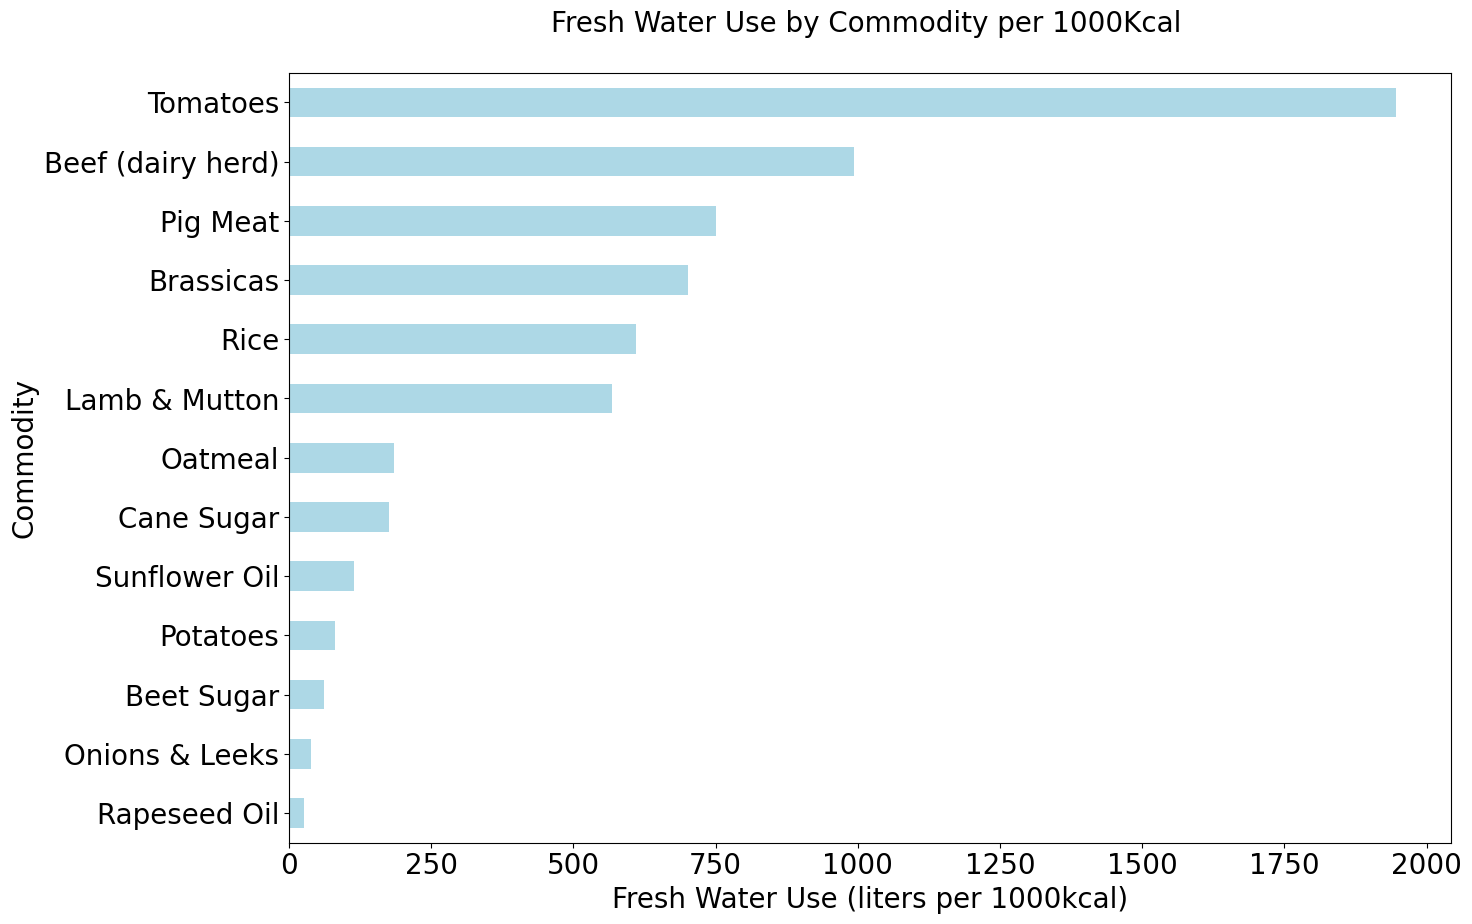

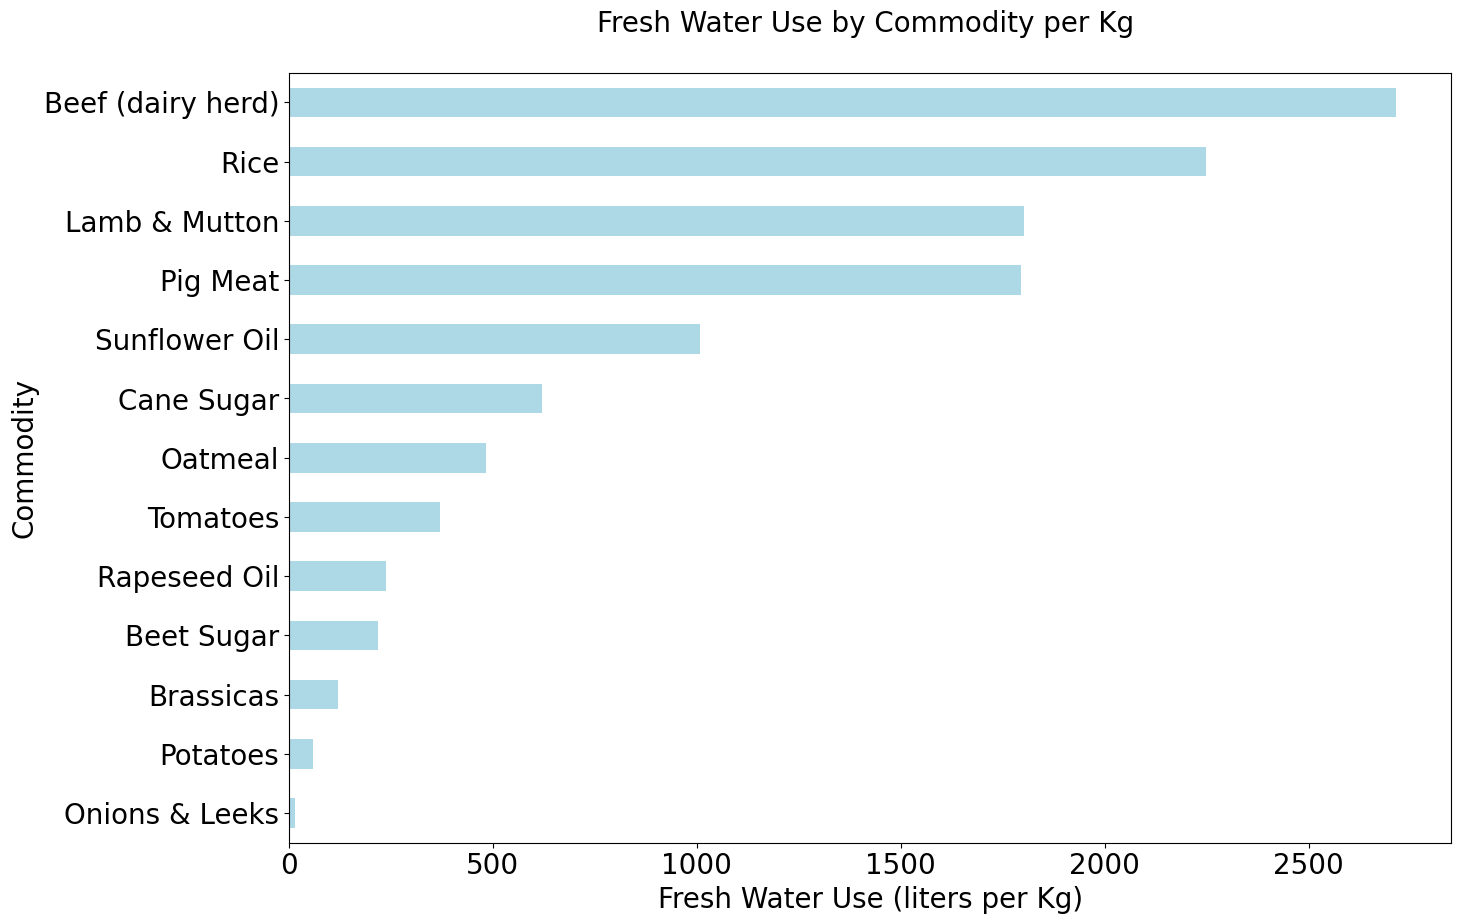

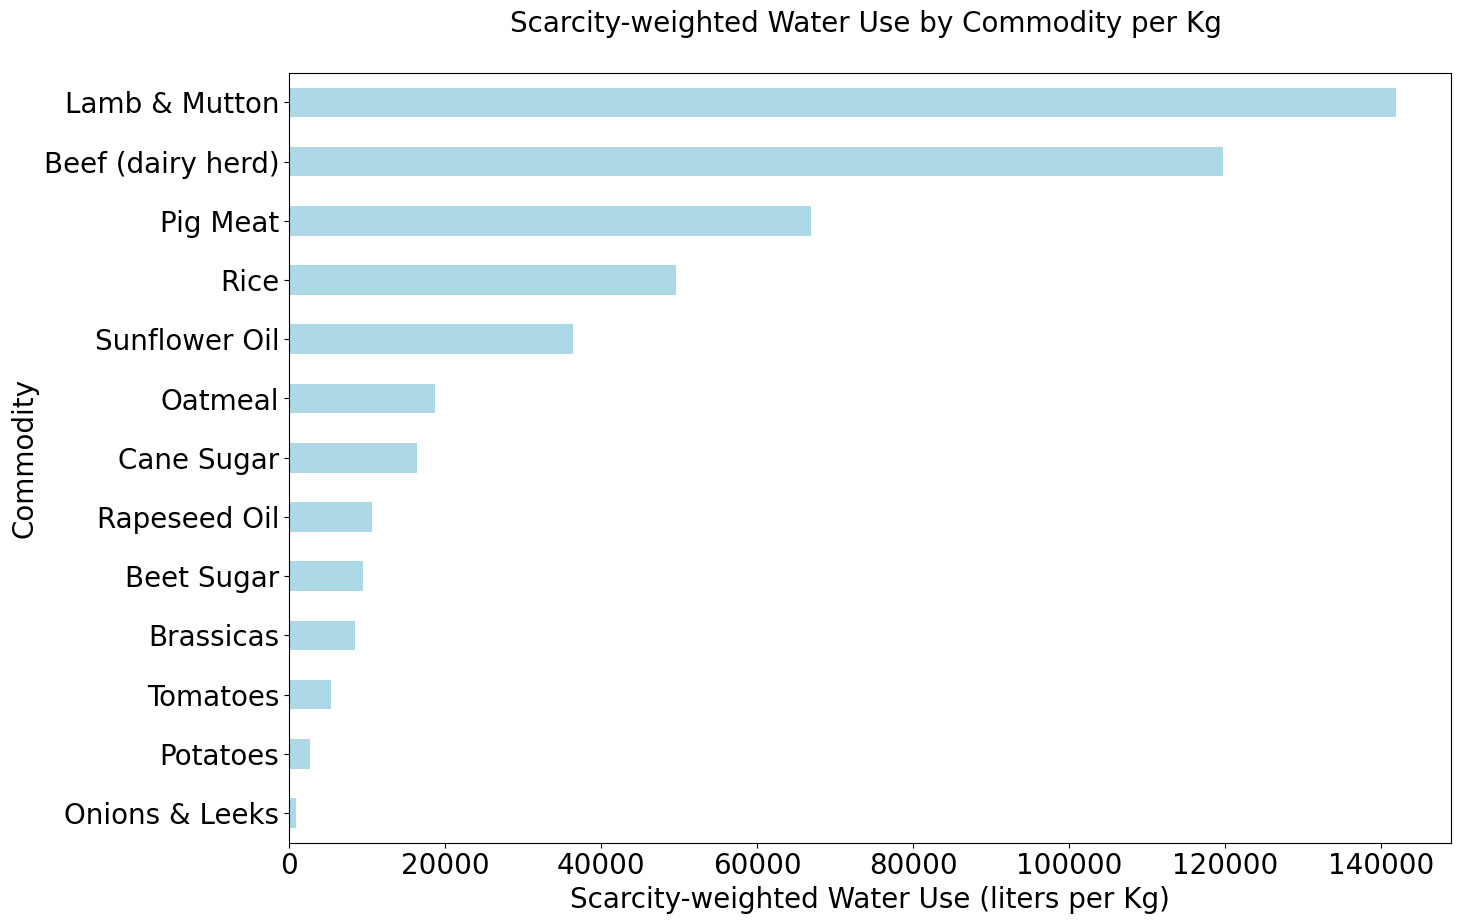

In [1153]:

# Freshwater withdrawals per 1000kcal
water_kcal_df = mean_df.sort_values(by='Freshwater withdrawals per 1000kcal (liters per 1000kcal)', ascending=True)['Freshwater withdrawals per 1000kcal (liters per 1000kcal)']

fig, ax = plt.subplots(figsize=(15,10))
water_kcal_df.plot(kind='barh', stacked=True, ax=ax, color='lightblue')
plt.xlabel("Fresh Water Use (liters per 1000kcal)")
plt.title("Fresh Water Use by Commodity per 1000Kcal \n", size=20)
plt.show()

# Freshwater withdrawals per kilogram
water_kg_df = mean_df.sort_values(by='Freshwater withdrawals per kilogram (liters per kilogram)', ascending=True)['Freshwater withdrawals per kilogram (liters per kilogram)']

fig, ax = plt.subplots(figsize=(15,10))
water_kg_df.plot(kind='barh', stacked=True, ax=ax, color='lightblue')
plt.xlabel("Fresh Water Use (liters per Kg)")
plt.title("Fresh Water Use by Commodity per Kg \n", size=20)
plt.show()

# Scarcity-weighted water use per kilogram
scarcity_df = mean_df.sort_values(by='Scarcity-weighted water use per kilogram (liters per kilogram)', ascending=True)['Scarcity-weighted water use per kilogram (liters per kilogram)']

fig, ax = plt.subplots(figsize=(15,10))
scarcity_df.plot(kind='barh', stacked=True, ax=ax, color='lightblue')
plt.xlabel("Scarcity-weighted Water Use (liters per Kg)")
plt.title("Scarcity-weighted Water Use by Commodity per Kg \n", size=20)
plt.show()


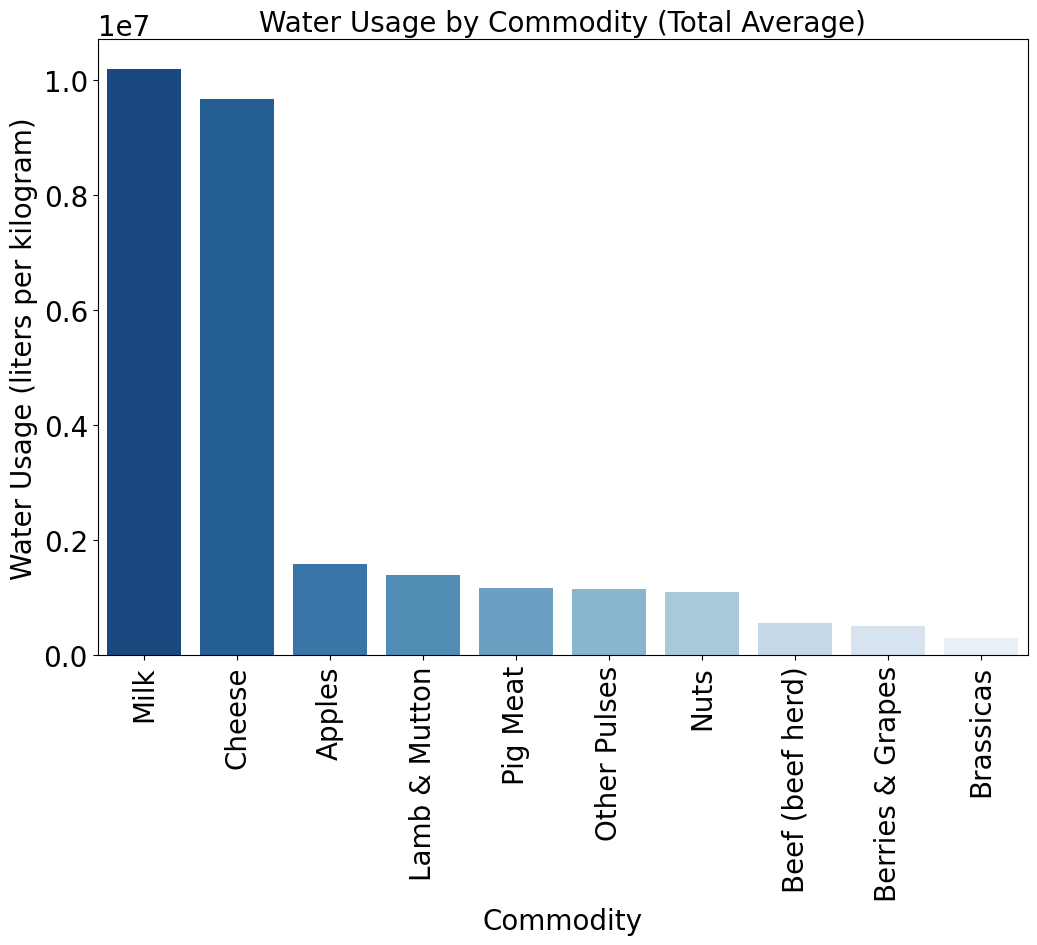

In [1152]:
# Original DataFrame in scientific notation
df = pd.DataFrame({
    'Commodity': ['Milk', 'Cheese', 'Apples', 'Lamb & Mutton', 'Pig Meat', 
                  'Other Pulses', 'Nuts', 'Beef (beef herd)', 'Berries & Grapes', 'Brassicas'],
    'Total Average': [1.019570e+07, 9.678795e+06, 1.593678e+06, 1.391444e+06, 
                      1.165247e+06, 1.154120e+06, 1.107694e+06, 5.632008e+05, 
                      5.046458e+05, 2.967526e+05]
})

# Convert scientific notation to regular numbers
df['Total Average'] = df['Total Average'].apply(lambda x: format(x, 'f'))

# Create commodities dictionary
commodities = df.set_index('Commodity')['Total Average'].to_dict()

commodities_df = pd.DataFrame(list(commodities.items()), columns=['Commodity', 'Water Usage'])

# Convert 'Water Usage' to float type
commodities_df['Water Usage'] = commodities_df['Water Usage'].astype(float)

# Sort the DataFrame by water usage
commodities_df.sort_values('Water Usage', ascending=False, inplace=True)

# Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Commodity', y='Water Usage', data=commodities_df, palette="Blues_r")
plt.title('Water Usage by Commodity (Total Average)')
plt.xlabel('Commodity')
plt.ylabel('Water Usage (liters per kilogram)')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.show()


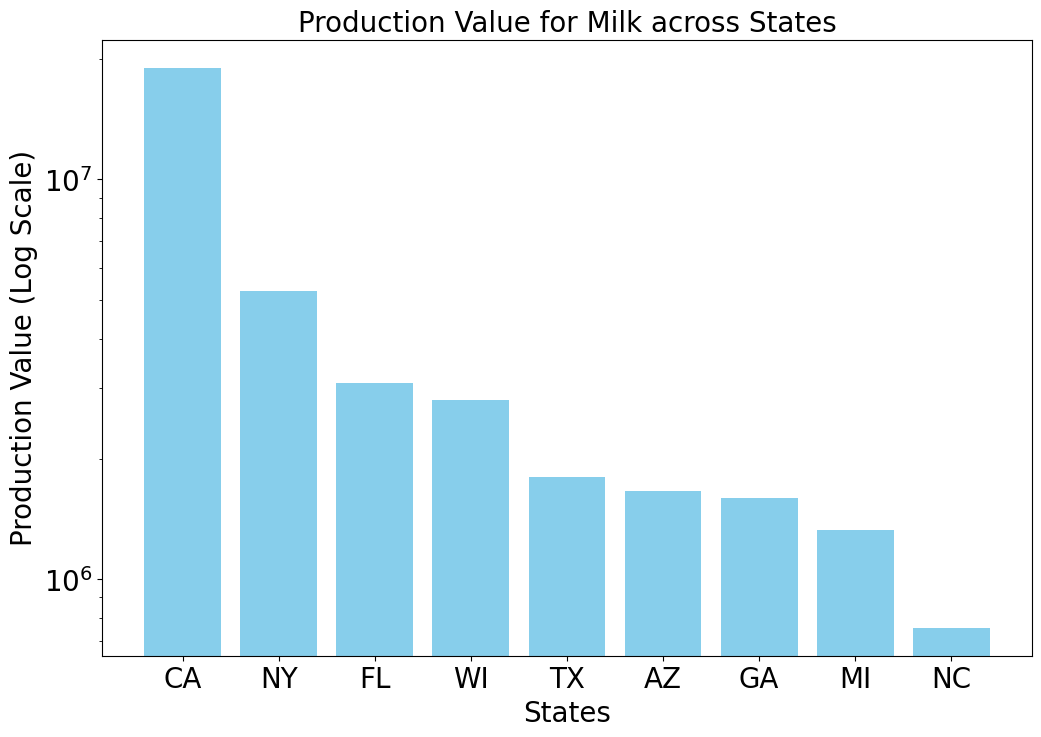

In [1148]:

# Repeat the sort and visualize steps
water_intensive_produce_sorted = water_intensive_produce.sort_values('Value', ascending=False)

# Plotting
plt.figure(figsize=(12,8))
plt.bar(water_intensive_produce_sorted['State'], water_intensive_produce_sorted['Value'], color='skyblue')
plt.xlabel('States')
plt.ylabel('Production Value (Log Scale)')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title(f'Production Value for {highest_water_use} across States')
plt.show()


#top_water_use_commodities


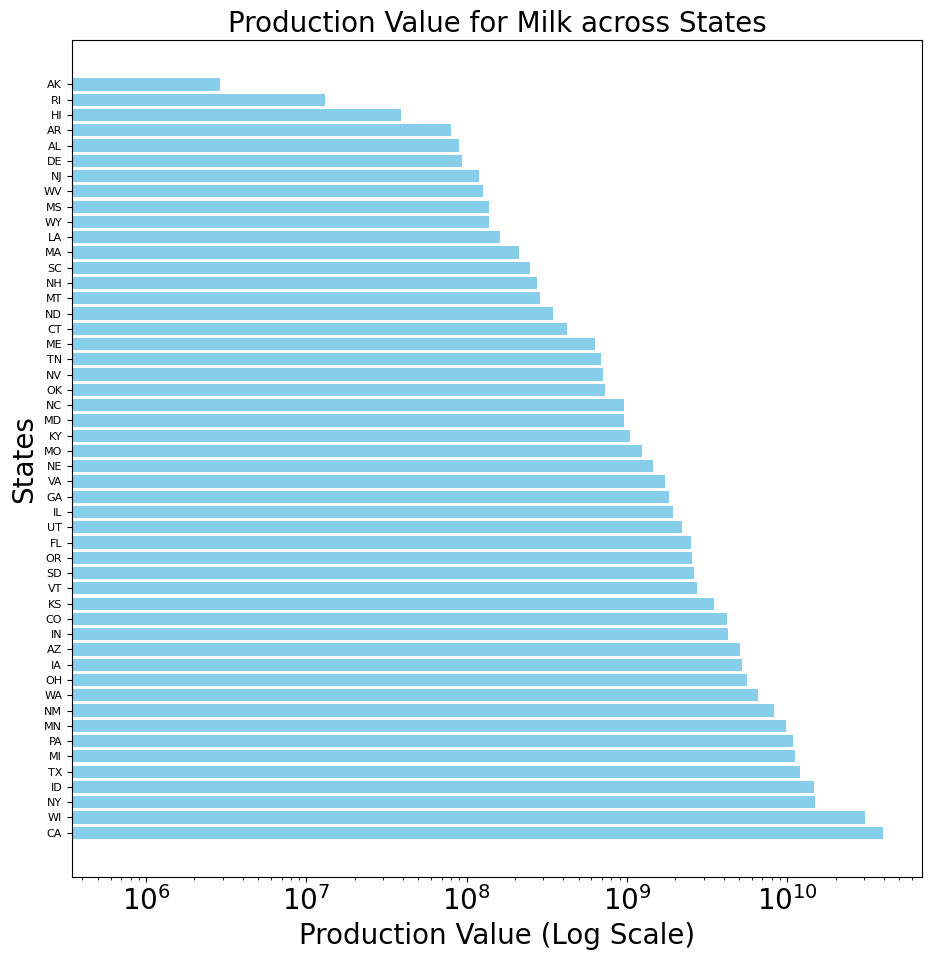

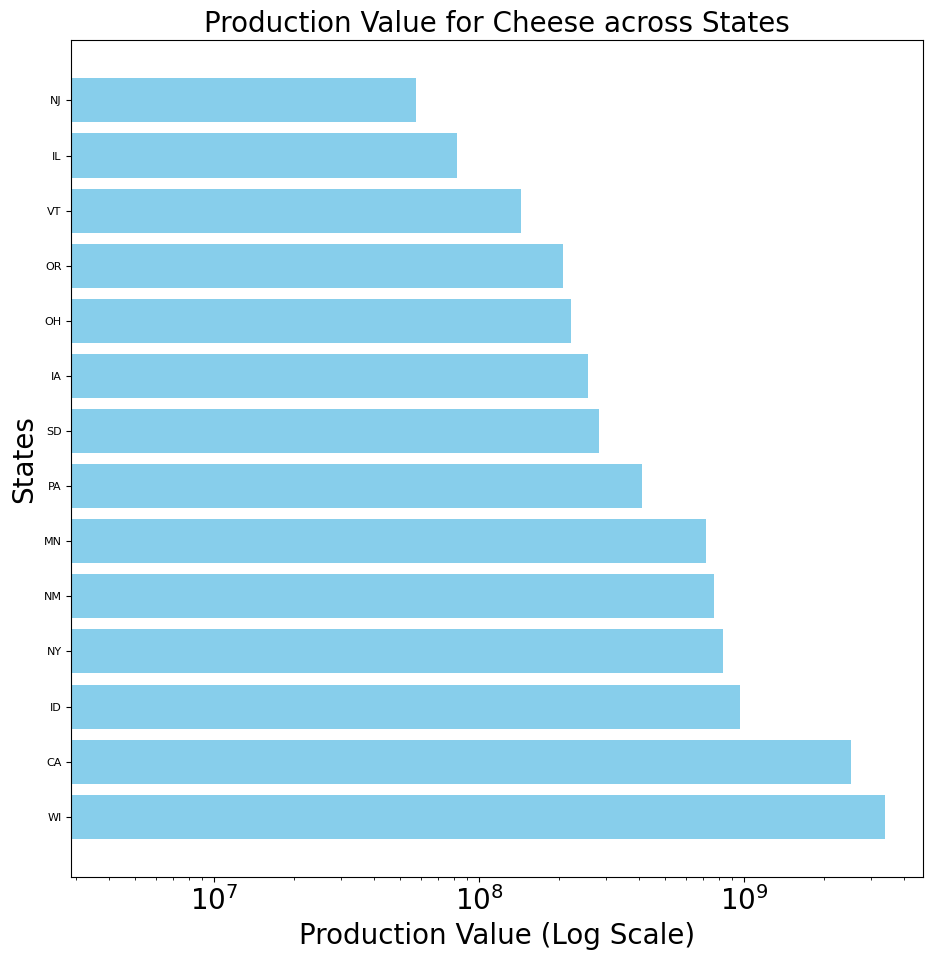

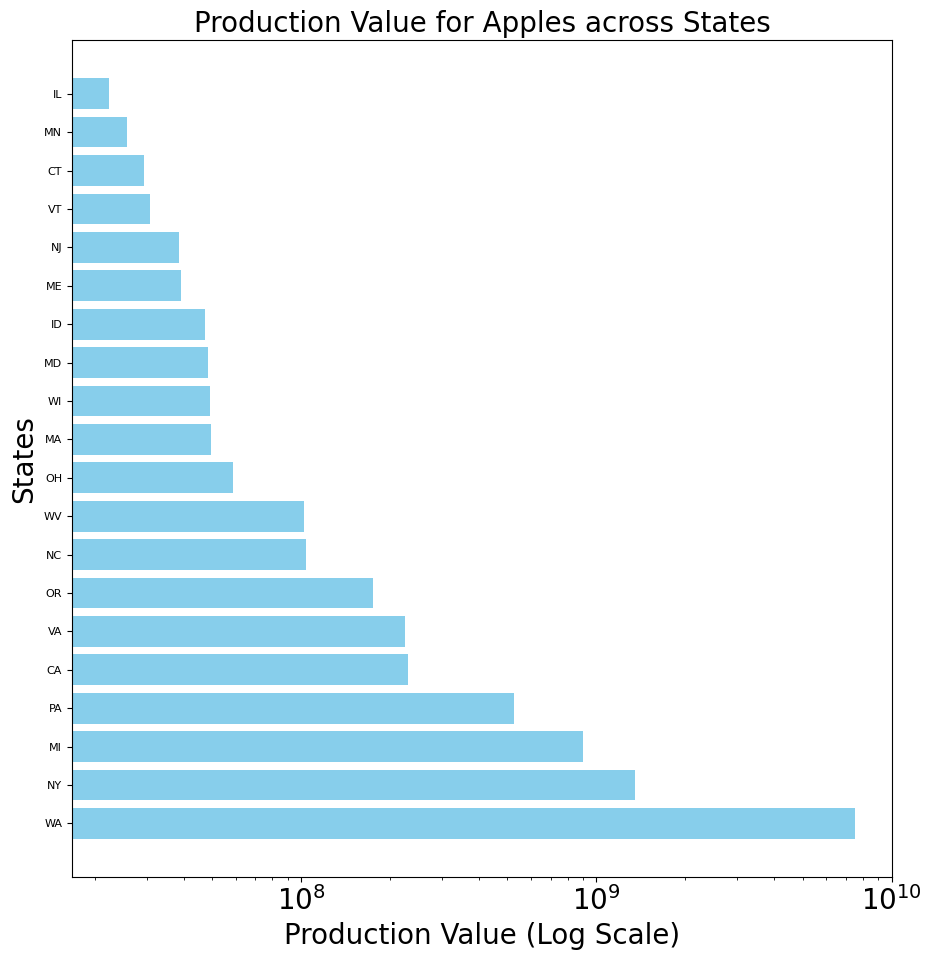

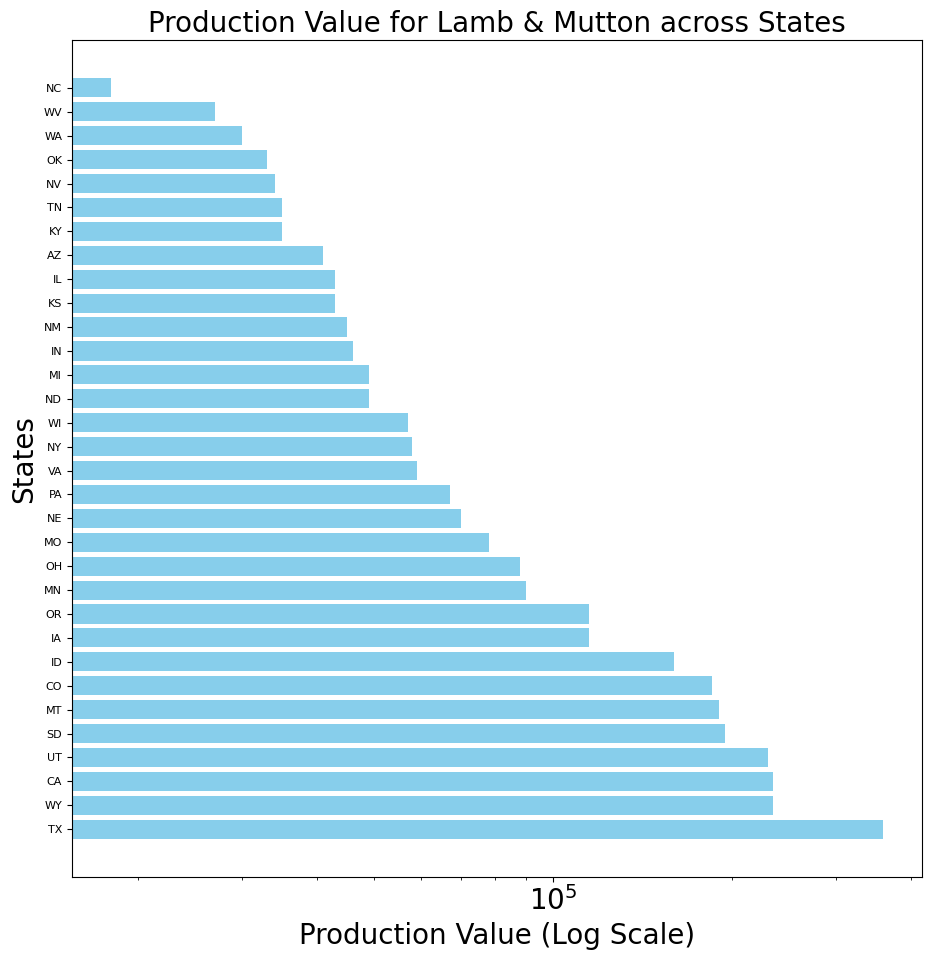

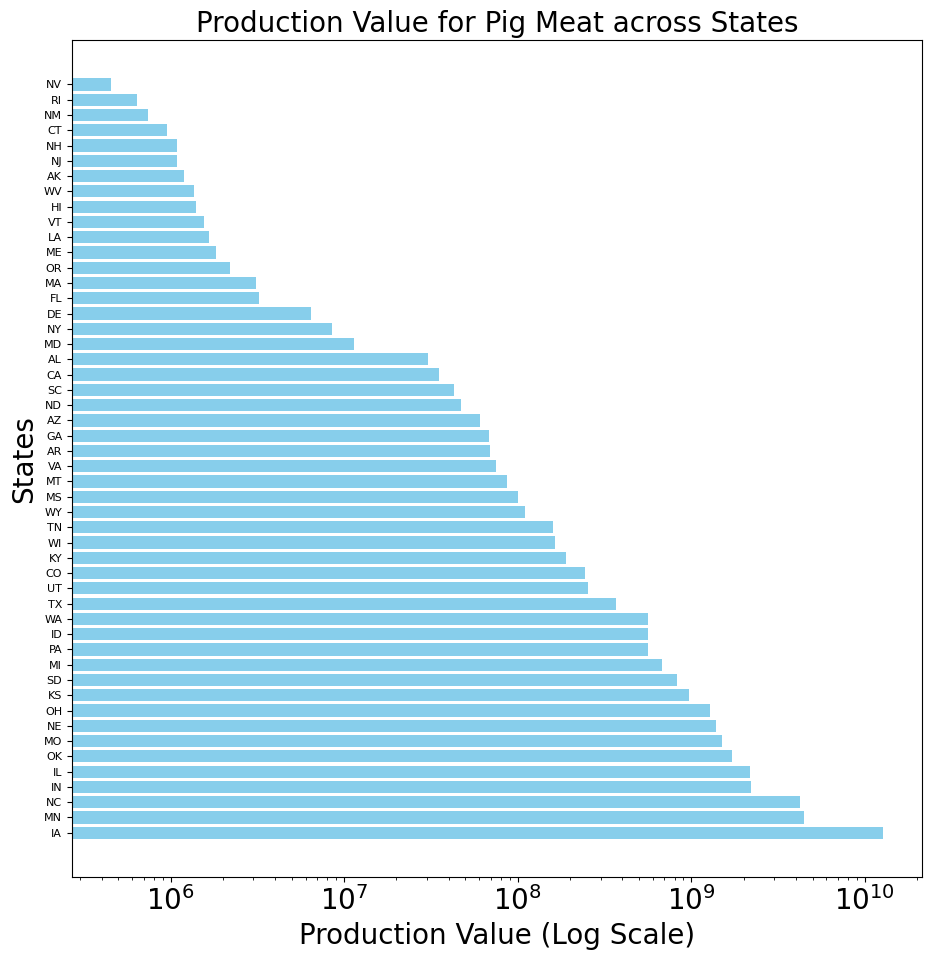

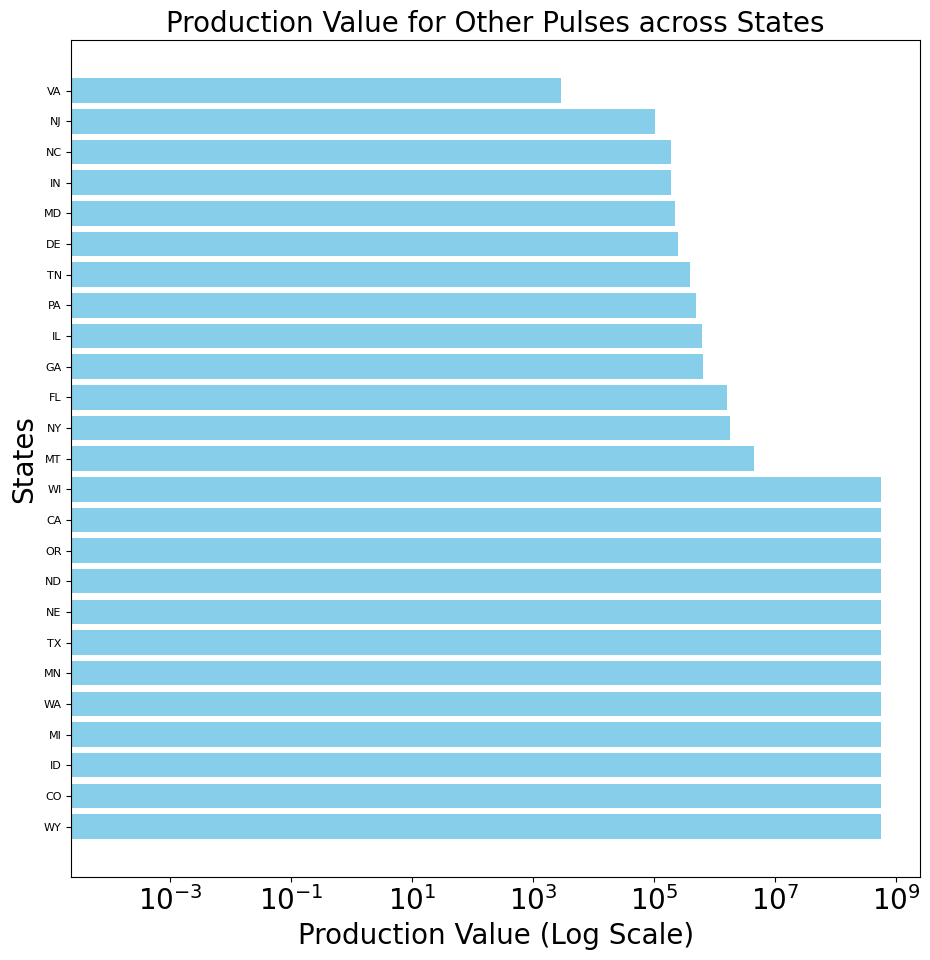

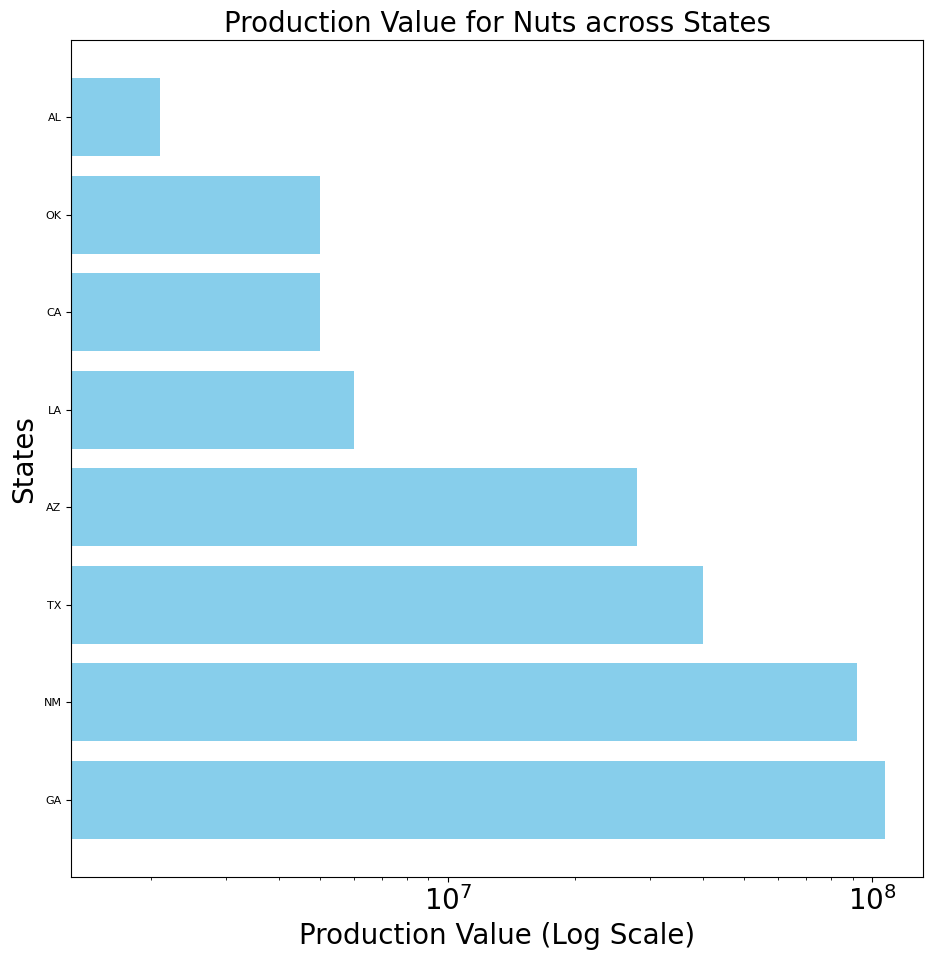

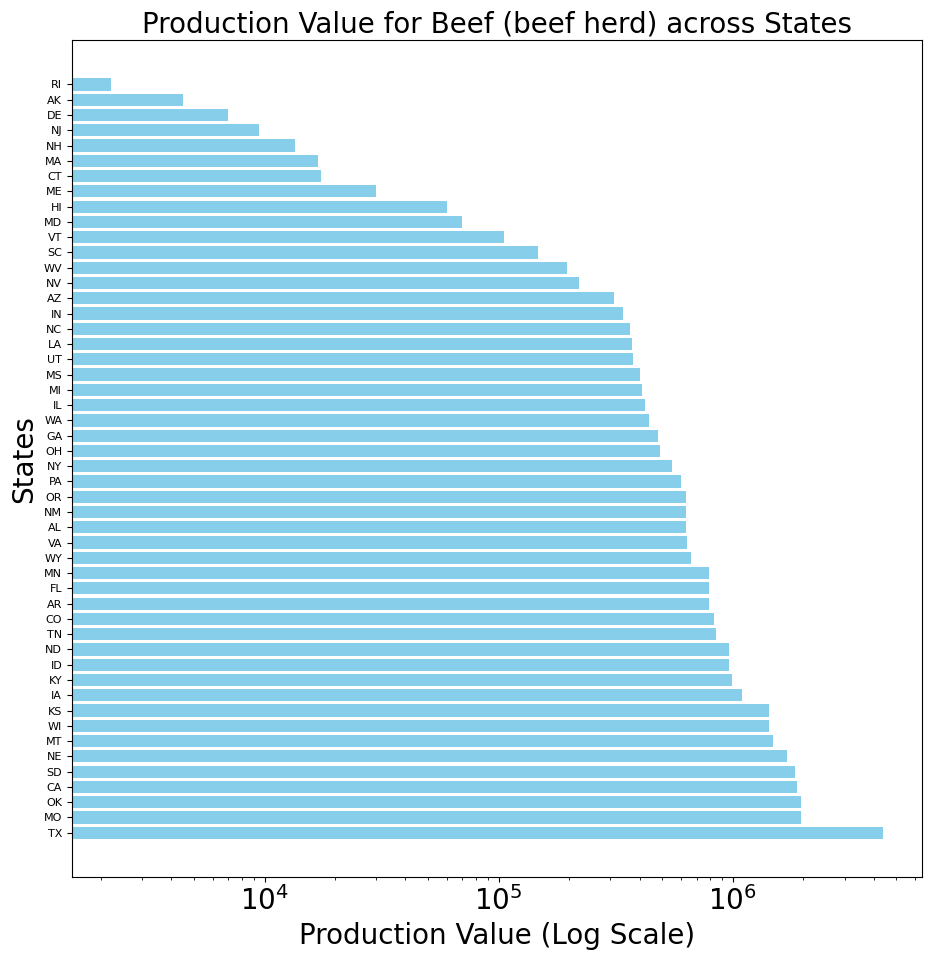

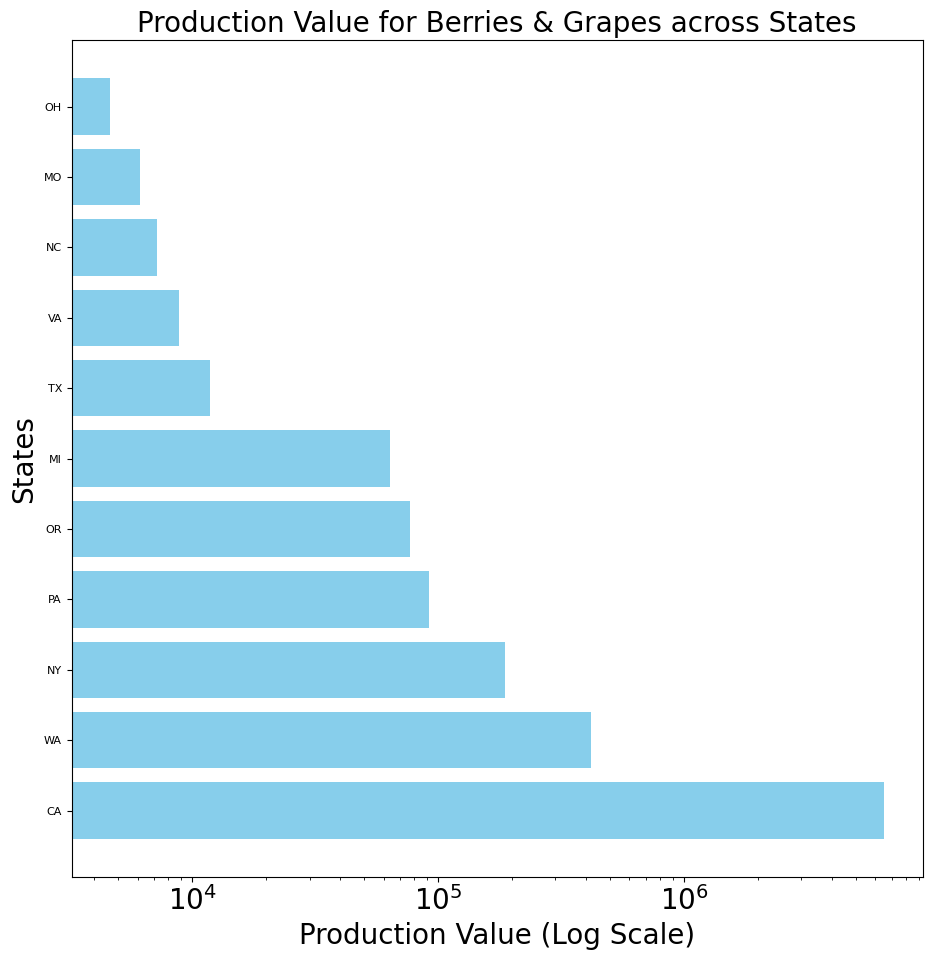

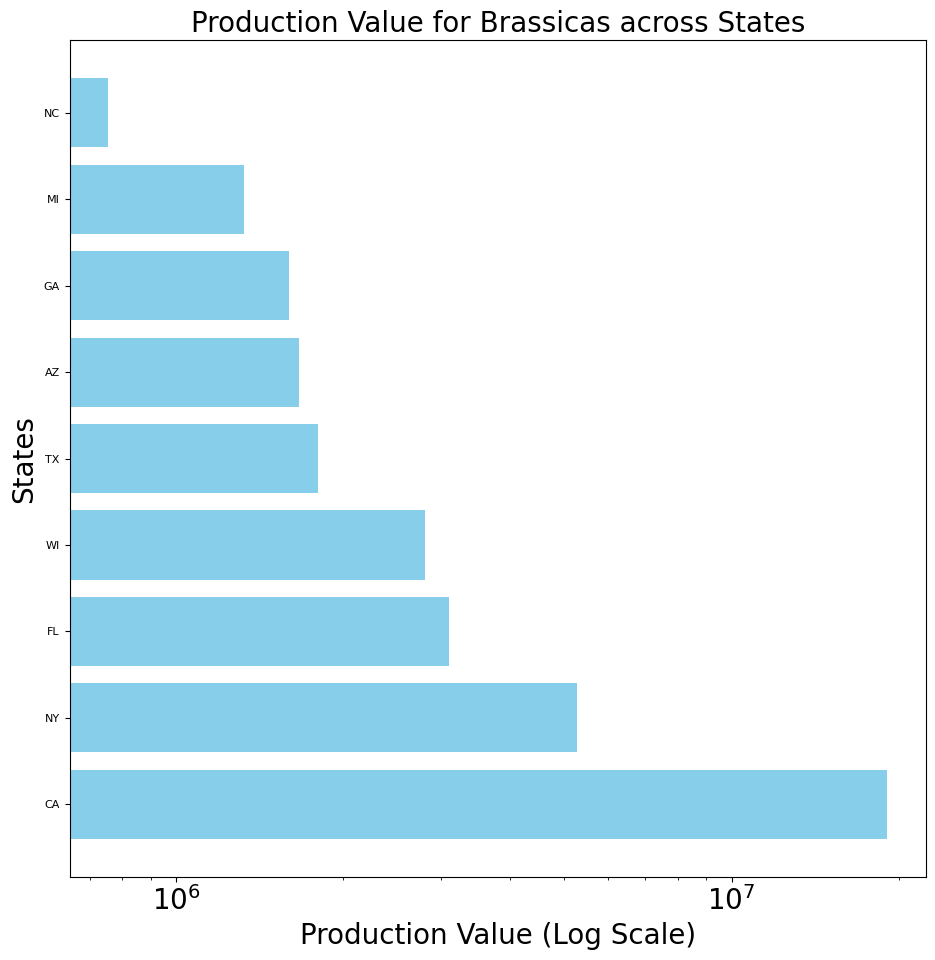

In [1149]:
# Loop through each commodity and create a bar plot
for commodity in top_commodities:
    # Filter out the data for the commodity
    commodity_data = final_df[final_df['Commodity'] == commodity].copy()

    # Replace any zero values with a small number to avoid -inf in log scale
    commodity_data.loc[commodity_data['Value'] == 0, 'Value'] = 1e-4
    
    # Sort the dataframe by 'Value' in descending order
    commodity_data_sorted = commodity_data.sort_values('Value', ascending=False)
    
    # Create a bar plot
    plt.figure(figsize=(10,10))  # Adjust plot size to give more room for state labels
    bar_plot = plt.barh(commodity_data_sorted['State'], commodity_data_sorted['Value'], color='skyblue')  # Use barh for horizontal bar chart
    plt.ylabel('States')
    plt.xlabel('Production Value (Log Scale)')
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.title(f'Production Value for {commodity} across States')
    plt.tight_layout()  # Adjust subplot parameters to give specified padding

    # Reduce font size
    plt.yticks(fontsize=8)

    plt.show()


In [1147]:
print(final_df['Value'].dtypes)


float64


In [ ]:
# Convert 'Value' column to integers
water_intensive_produce['Value'] = water_intensive_produce['Value'].str.replace(',', '').astype(int)


AttributeError: Can only use .str accessor with string values!

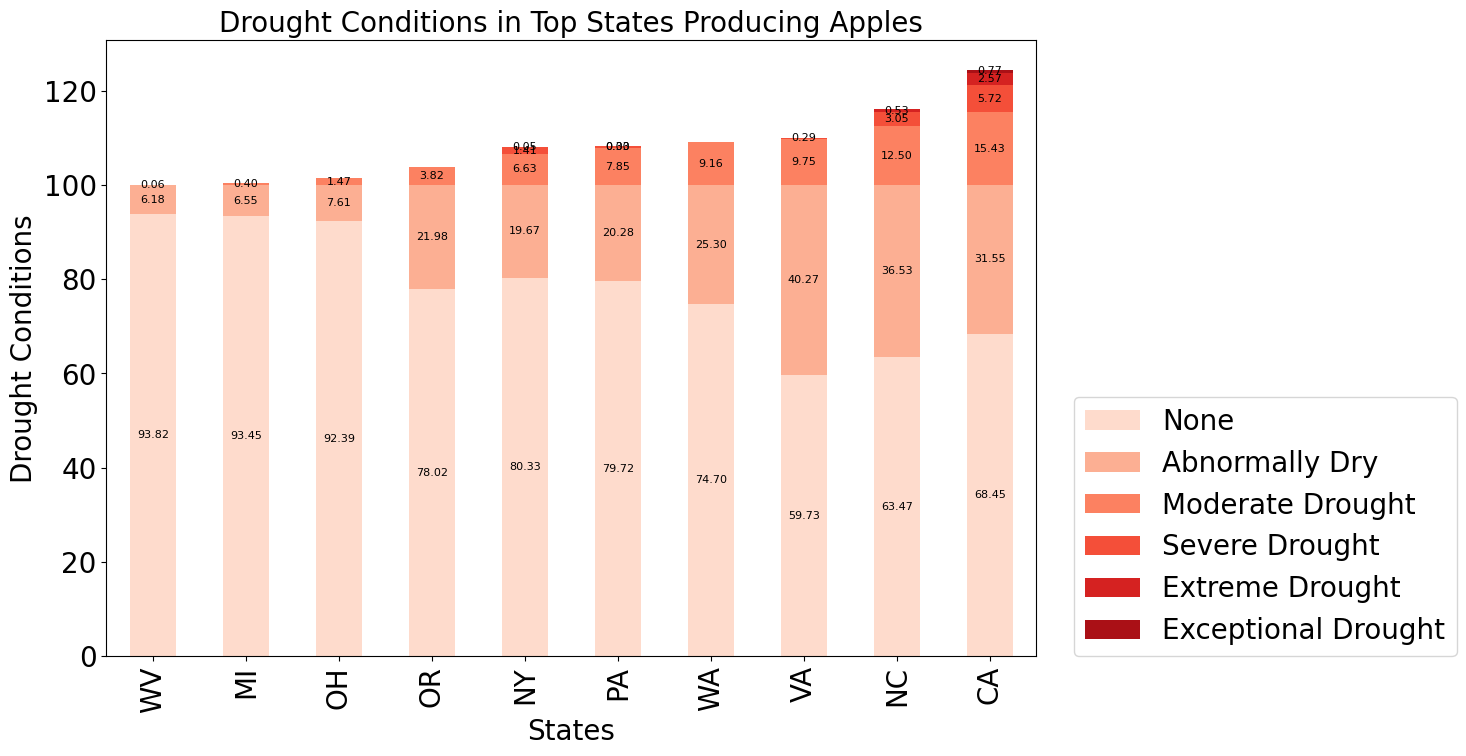

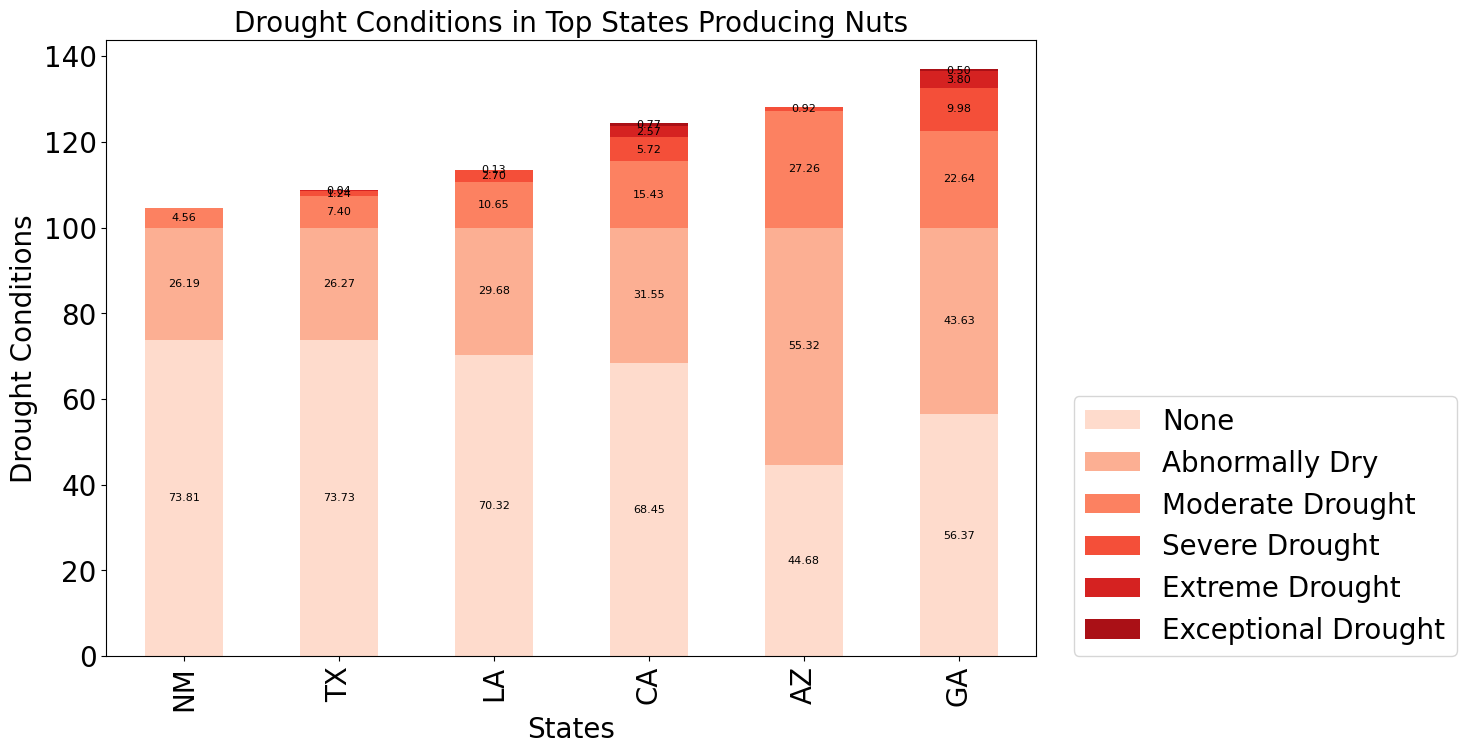

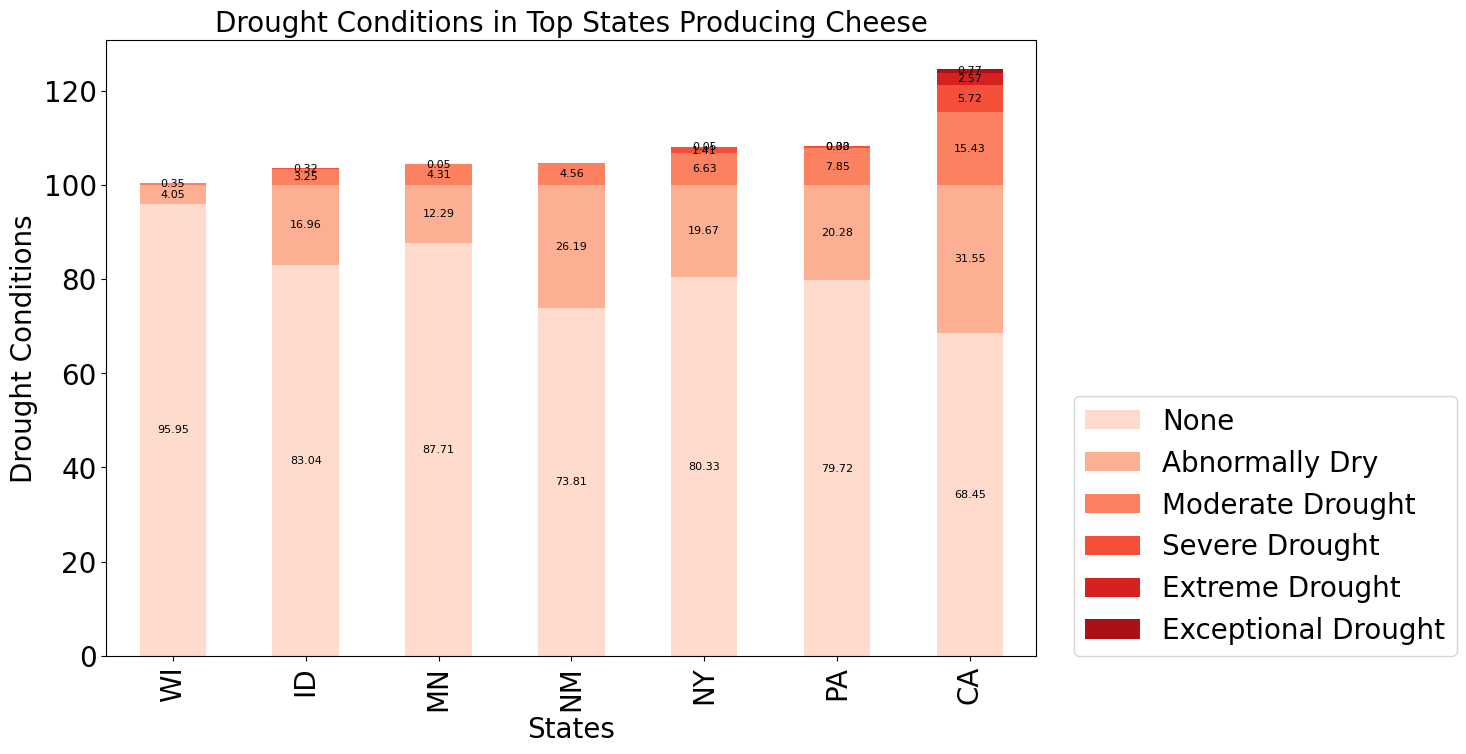

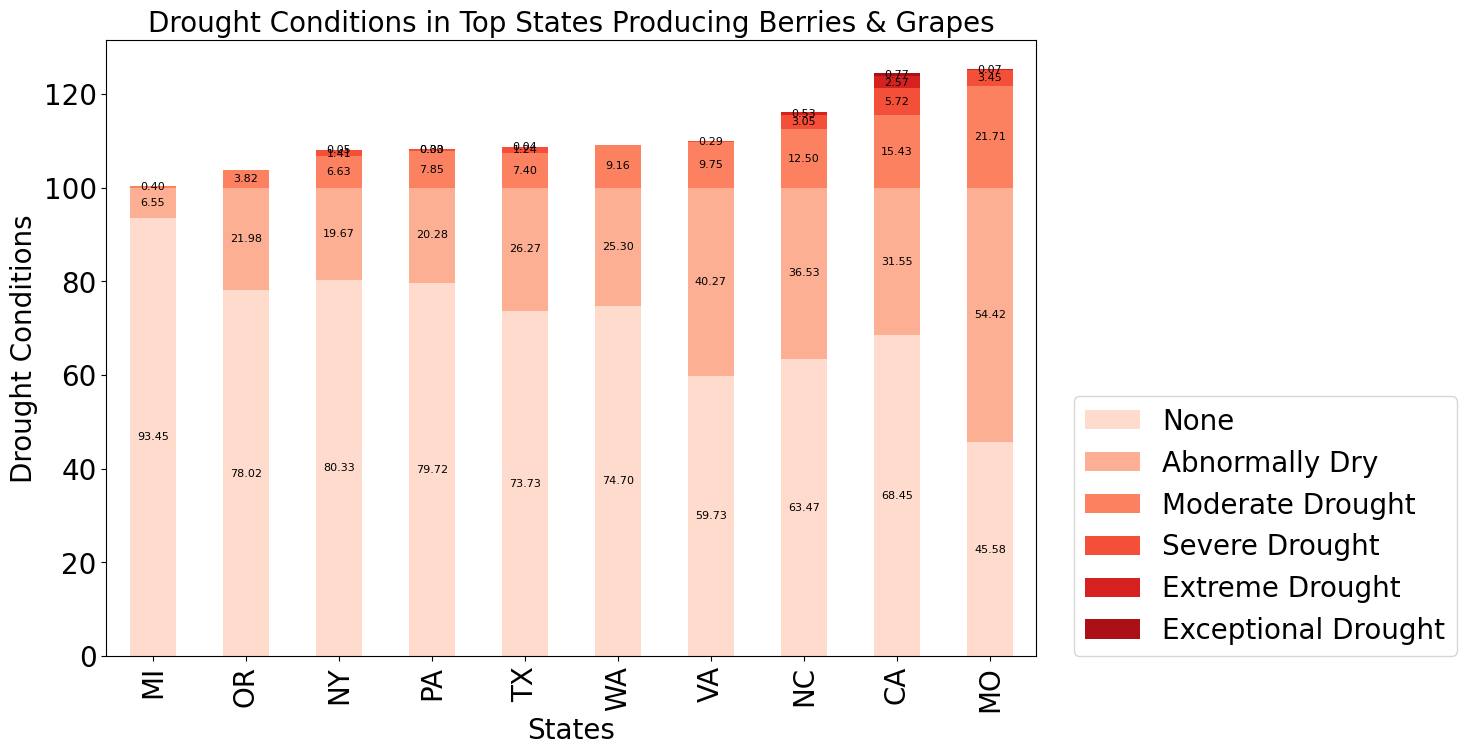

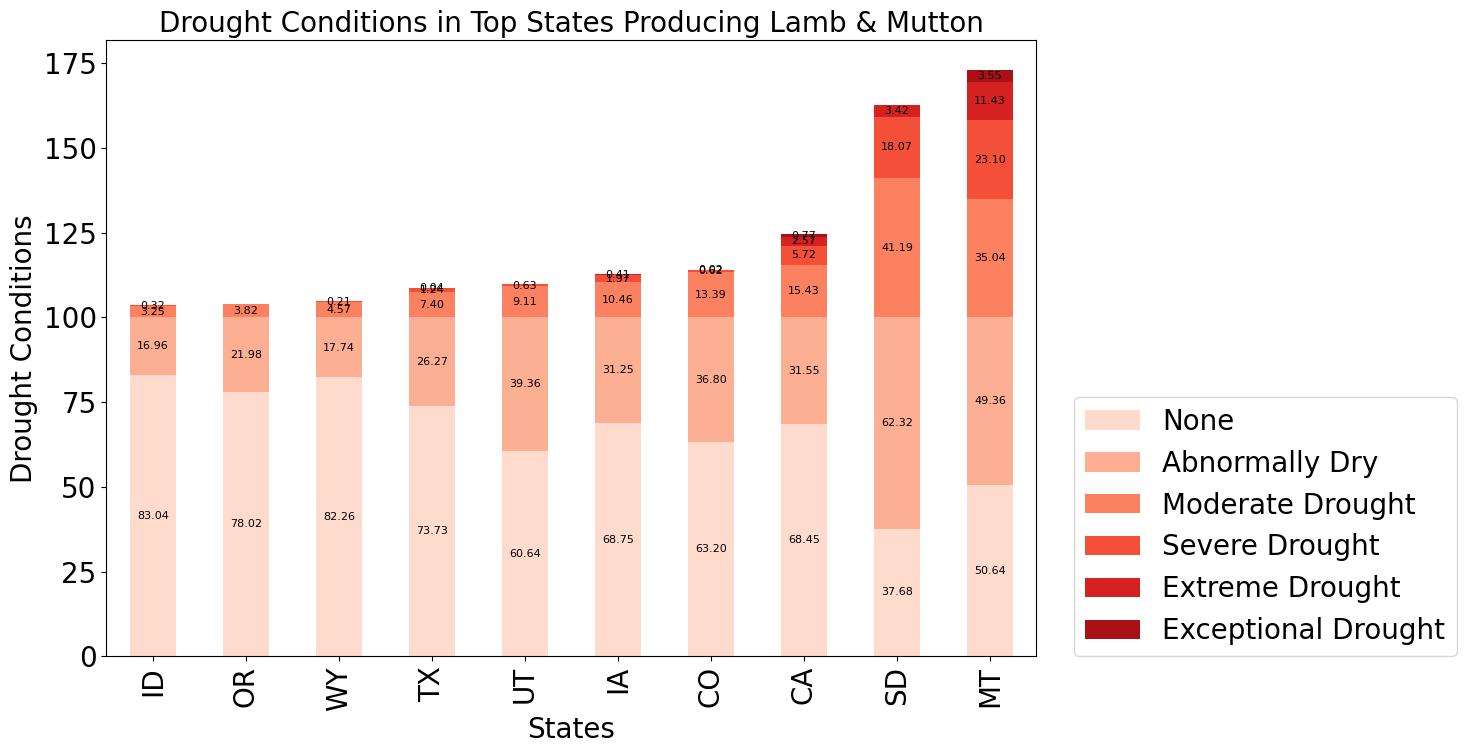

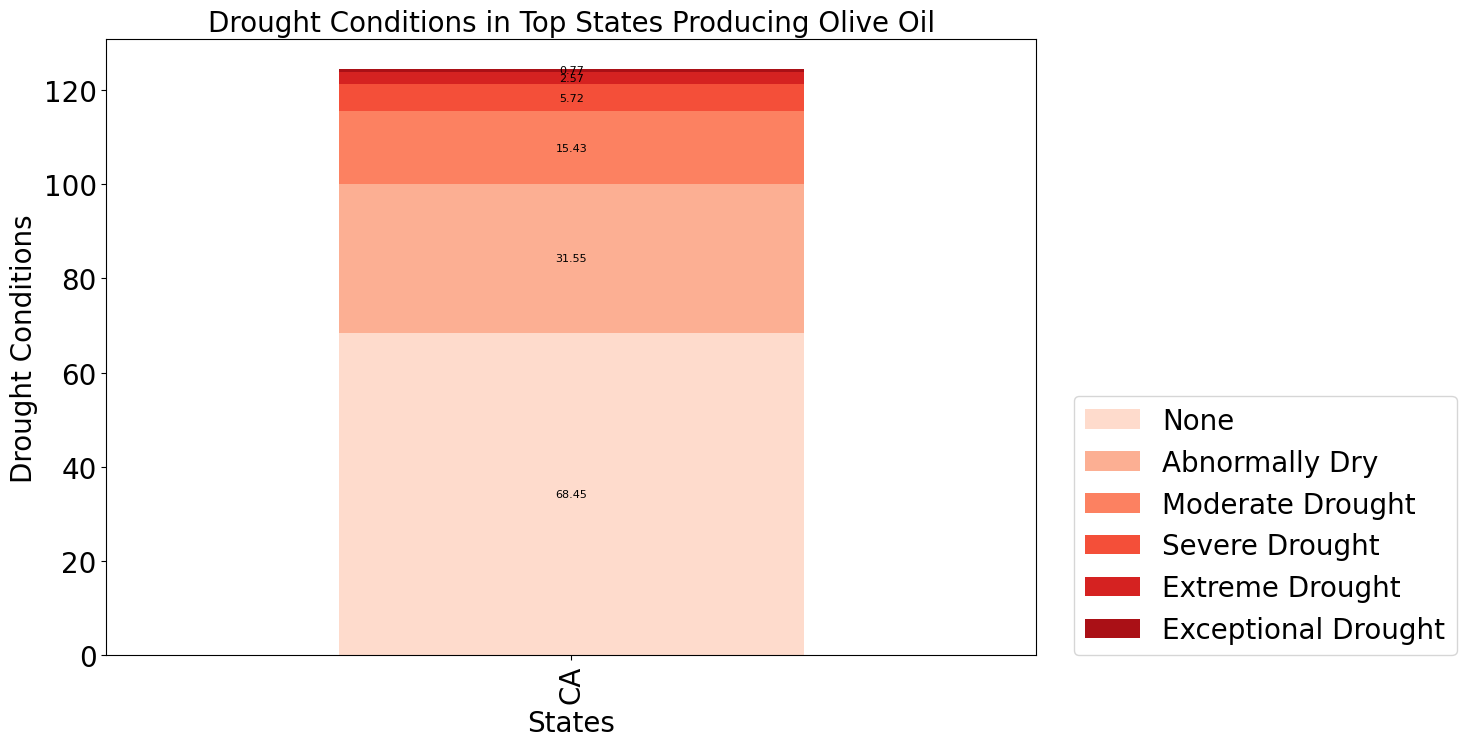

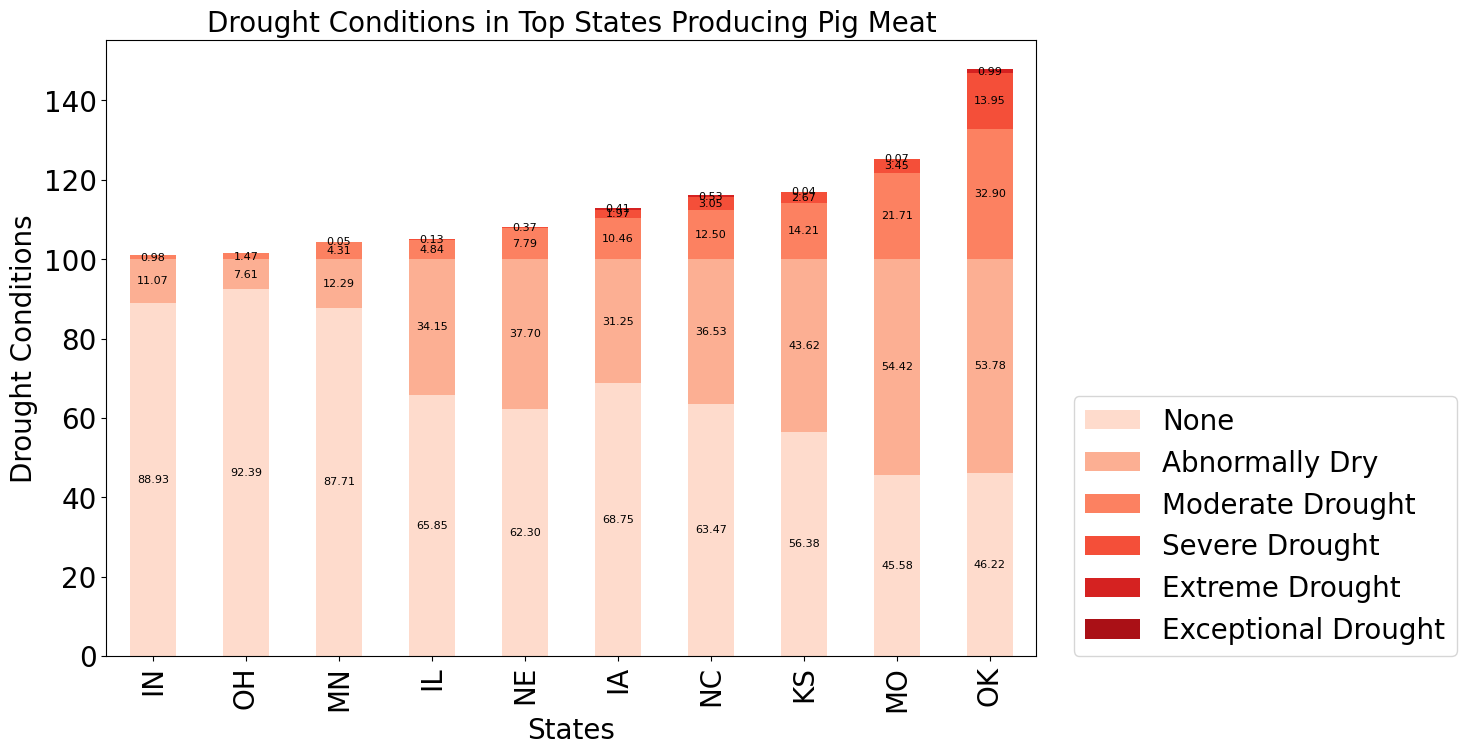

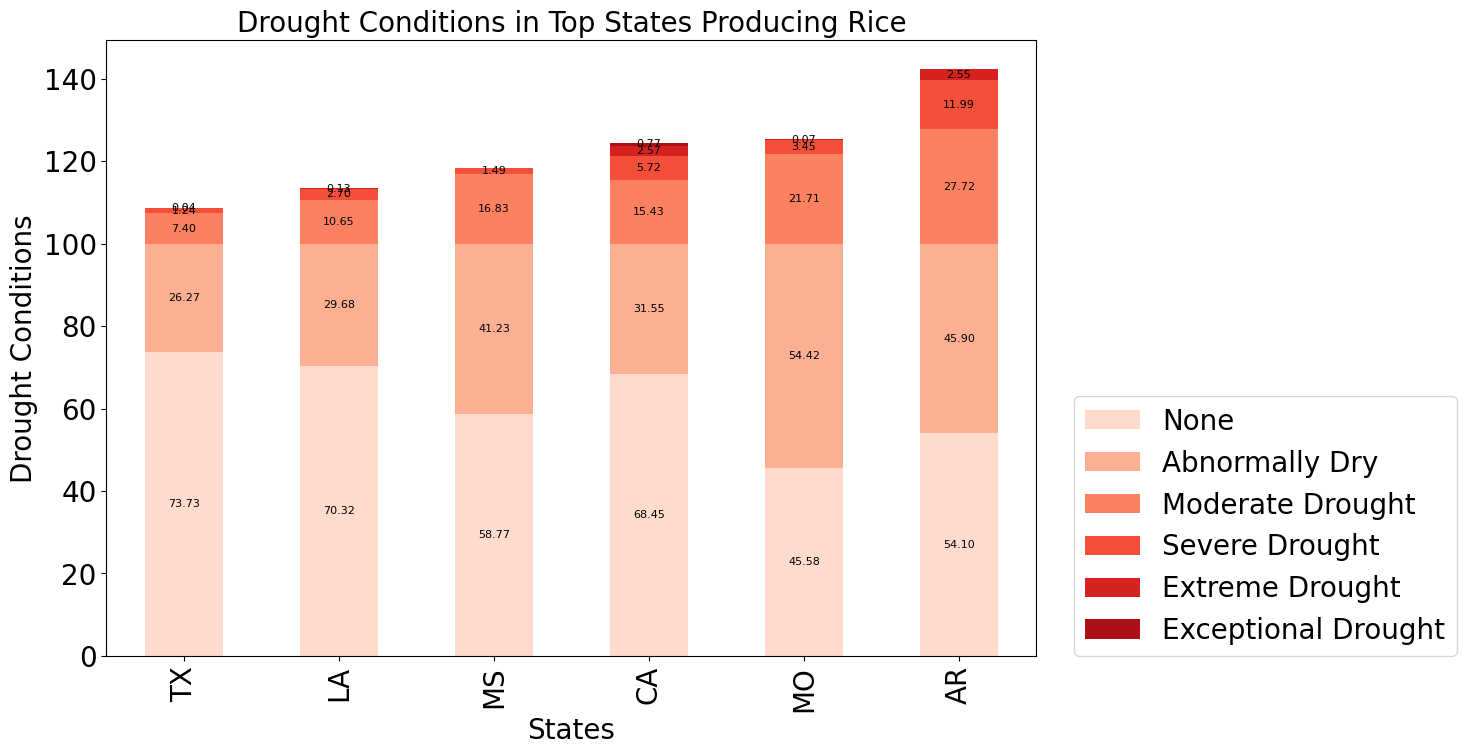

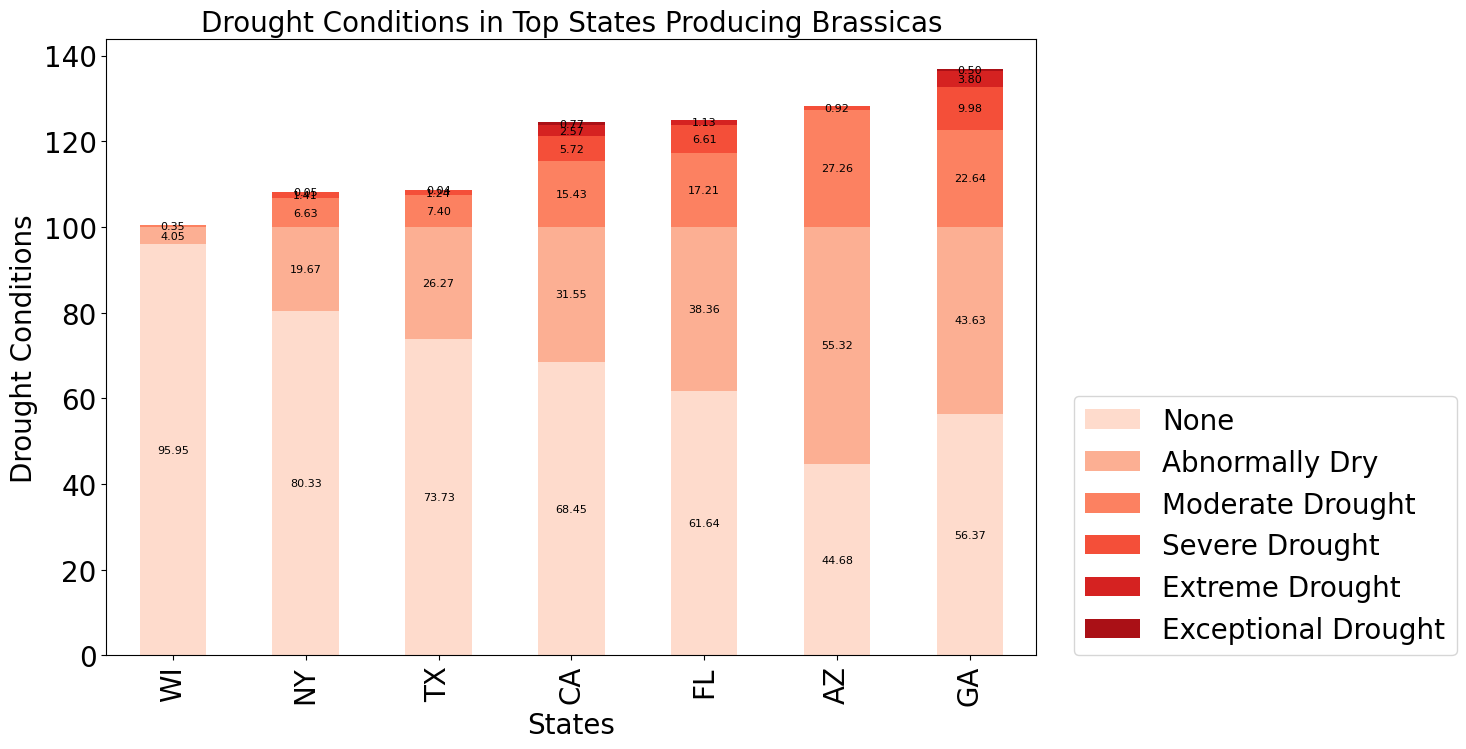

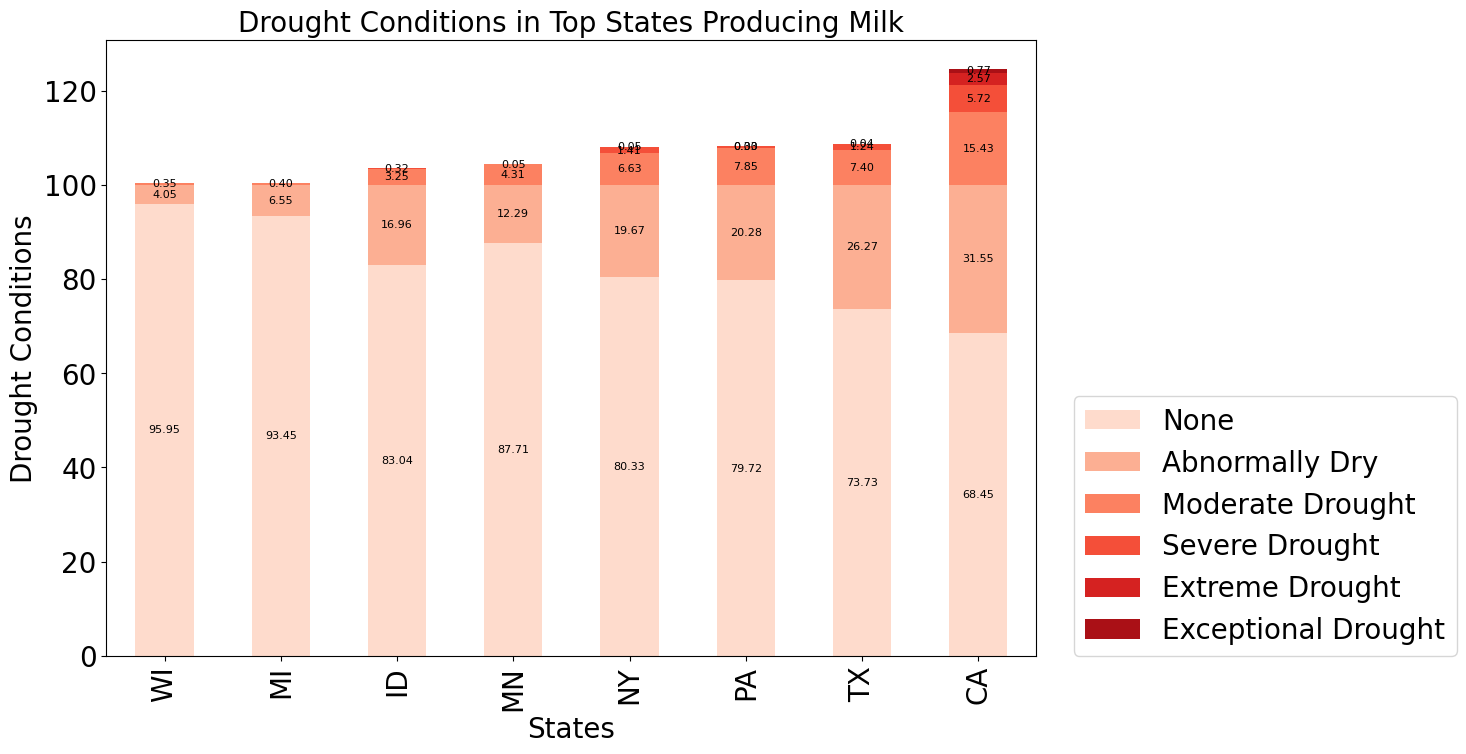

In [1151]:
# Loop over commodities
for commodity in commodities:
    # Get production data for the commodity
    production_data = merged_df[merged_df['Commodity'] == commodity].sort_values('Value', ascending=False)

    # Get drought condition data for states producing the commodity
    top_states = production_data['State'][:10]
    drought_conditions = df_drought_new.loc[df_drought_new['State'].isin(top_states)][['State', 'None', 'Abnormally Dry', 'Moderate Drought', 'Severe Drought', 'Extreme Drought', 'Exceptional Drought']]

    # Group by state and calculate mean
    drought_conditions = drought_conditions.groupby('State').mean()

    # Sort states by total drought conditions
    drought_conditions['total'] = drought_conditions.sum(axis=1)
    drought_conditions.sort_values('total', inplace=True)
    drought_conditions.drop(columns='total', inplace=True)

    # Define a color palette
    colors = sns.color_palette('Reds', n_colors=6)

    # Create stacked bar plot
    ax = drought_conditions.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)

    # Add labels
    for i, rect in enumerate(ax.patches):
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}'

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

    # Move the legend
    ax.legend(loc=(1.04, 0))

    plt.xlabel('States')
    plt.ylabel('Drought Conditions')
    plt.title(f'Drought Conditions in Top States Producing {commodity}')
    plt.show()



#### Top 10 Commodities with Highest Total Water Use:


The top 10 commodities with the highest total water use are identified based on the sum of their water use in different metrics (per 1000kcal, per 100g protein, per kilogram). These commodities are ranked by their average total water use, which considers various water consumption metrics. Milk and Cheese emerge as the two commodities with the highest total average water use, followed by Apples, Lamb & Mutton, and Pig Meat.

**States Producing Water-Intensive Commodities and Experiencing Drought:**

The analysis delves into states that produce significant quantities of the top water-intensive commodities and are experiencing some level of drought. For each of the top commodities, the states that have high production rates and face drought conditions are identified. For example, California (CA) and Wisconsin (WI) are top producers of Milk and Cheese, respectively, while also experiencing drought conditions.

**Water Sustainability Challenges:**

The data analysis highlights the water sustainability challenges faced by the agriculture sector in the United States. Water-intensive commodities, such as Milk, Cheese, and Nuts, require substantial amounts of water for production. Simultaneously, many states responsible for producing these commodities face drought, which can impact agricultural productivity, water availability, and overall sustainability.



### Implications and Conclusion

**Policy Implications:**

The results emphasize the need for comprehensive water management policies and sustainable agricultural practices at both state and federal levels. Addressing water scarcity and promoting responsible water use are critical for ensuring food security and environmental preservation. Strategies that consider regional differences in water availability and drought conditions may be more effective in achieving sustainable agriculture practices.

**Importance of Eco-Labeling:**

The findings indicate that water-intensive agricultural products are produced in states with diverse water situations. This underscores the importance of eco-labeling for agricultural products, which could consider water usage and water pollution as primary criteria for certification. Decentralized eco-labeling approaches might be necessary to account for variations in water resources and drought levels across states.

**Future Research:**

Further research is warranted to explore the potential impacts of water-intensive agricultural practices on water resources and local ecosystems. Additionally, investigating the adoption of water-efficient technologies and practices in agriculture can offer insights into mitigating water-related challenges.

In conclusion, this analysis sheds light on the significant water usage associated with the top agricultural commodities in the United States and the importance of addressing water scarcity concerns in states with high agricultural productivity. <u>By understanding the water challenges faced by different states and agricultural sectors, policymakers can develop targeted strategies to promote sustainable water use and mitigate the environmental impacts of agriculture.<u>

### References 

